 # <span style="color:darkred">Customer Personality Analysis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import ppscore as pps
import sweetviz as sv

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import IsolationForest


from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster import hierarchy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder



from sklearn.metrics import accuracy_score




import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\shiva\AppData\Local\Temp\ipykernel_15632\3692745926.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
# to view all data of dataset
#pd.set_option("display.max_rows",None )

In [3]:
#read data

df = pd.read_excel("marketing_campaign1.xlsx")
df.head(30)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


# <span style="color:Purple">EDA

**<span style="color:darkbrown">DATA CLEANING**

In [4]:
#checking details about the dataset  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

<span style="color:skyblue"> There are 2240  rows and 29  columns. The data types assigned are correct.

In [5]:
#checking for null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
#dropping the null values
df.dropna(inplace=True)

<span style="color:skyblue">Droping all null value present in Income column.

In [7]:
#checking for duplicated rows
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


<span style="color:skyblue">No duplicate record are present in dataset.

In [8]:
#define all unique values
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [9]:
#displaying the basic descriptive stats like mean, std deviation, median, min, max...
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417


In [10]:
#count the response value yes or no
df.Response.value_counts()

Response
0    1883
1     333
Name: count, dtype: int64

<span style="color:skyblue">Where count the response 0 and 1.

In [11]:
# get the value of this two column because of same value present in same value
df[['Z_CostContact','Z_Revenue']]

,Z_CostContact,Z_Revenue
0,3,11
1,3,11
2,3,11
3,3,11
4,3,11
...,...,...
2235,3,11
2236,3,11
2237,3,11
2238,3,11


In [12]:
df = df.drop(columns=["Z_CostContact","Z_Revenue"],axis=1)

<span style="color:skyblue">Z_CostContact, Z_Revenue have a same value in each row, they are not contribute anything in model bulding so we drop them.

In [13]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [14]:
# creating a column Age from Year_Birth 
df['Age'] = 2024 - df['Year_Birth']

df['Age']

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2216, dtype: int64

<span style="color:skyblue">Age column is created where we can see the age of customer.

<Axes: xlabel='Age', ylabel='Density'>

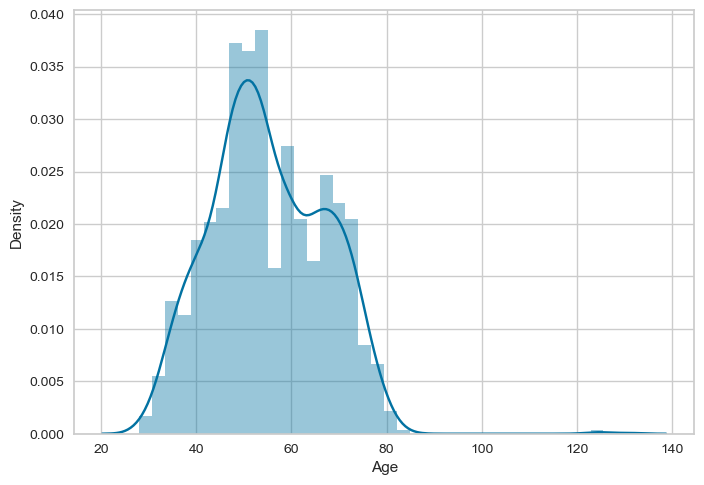

In [15]:
sns.distplot(df['Age'])

<span style="color:skyblue">As per distplot we see the most of the customer lies between Age of 40 to 70.

In [16]:

df['Education'] = df['Education'].replace(['Basic', '2n Cycle'],'Basic')


In [17]:
# value count for education 

df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
Basic          254
Name: count, dtype: int64

In [18]:
df.head(30)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,43
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,10,6,0,0,0,0,0,0,0,57
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,7,6,0,0,0,0,0,0,0,53
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,4,8,0,0,0,0,0,0,0,39
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,2,9,0,0,0,0,0,0,1,50
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,20,1,0,0,0,0,0,0,74


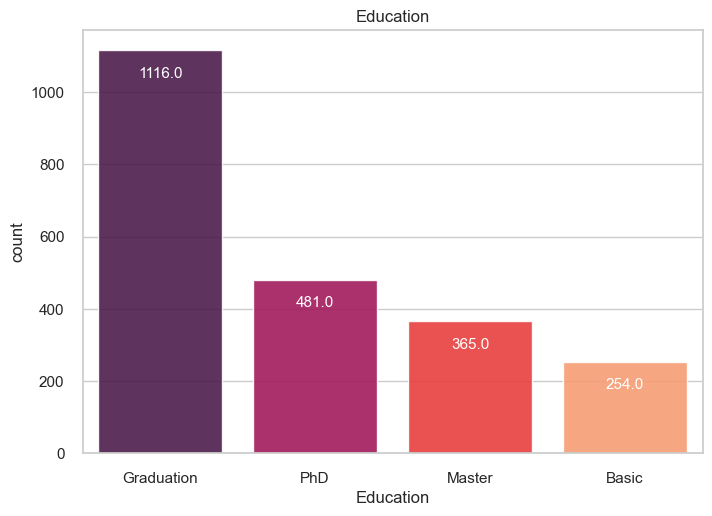

In [19]:
#plt.figure(figsize=(10, 10), facecolor='skyblue')
sns.set(style='whitegrid')

ax = sns.countplot(data=df, x='Education', saturation=2, alpha=0.9, palette='rocket', order=df['Education'].value_counts().index)
ax.set_title('Education')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)
plt.show()

Text(0.5, 1.0, 'Pie chart of Eduaction')

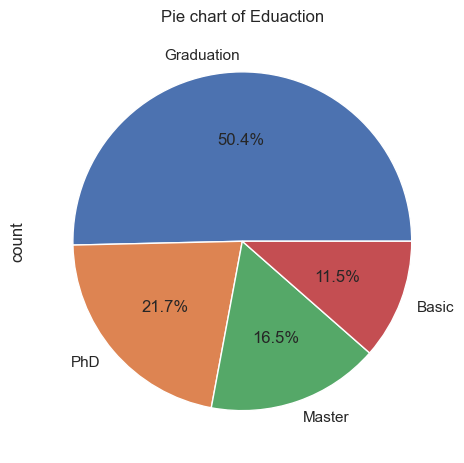

In [20]:
#pie chart for churn model where shows percentage of churn
df['Education'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title("Pie chart of Eduaction")

<span style="color:skyblue">As we see in the pie chart where the most 50% of the customer had done the Graduation and 2.4% customer had done the Basic.

Text(-49, 0, '676083')

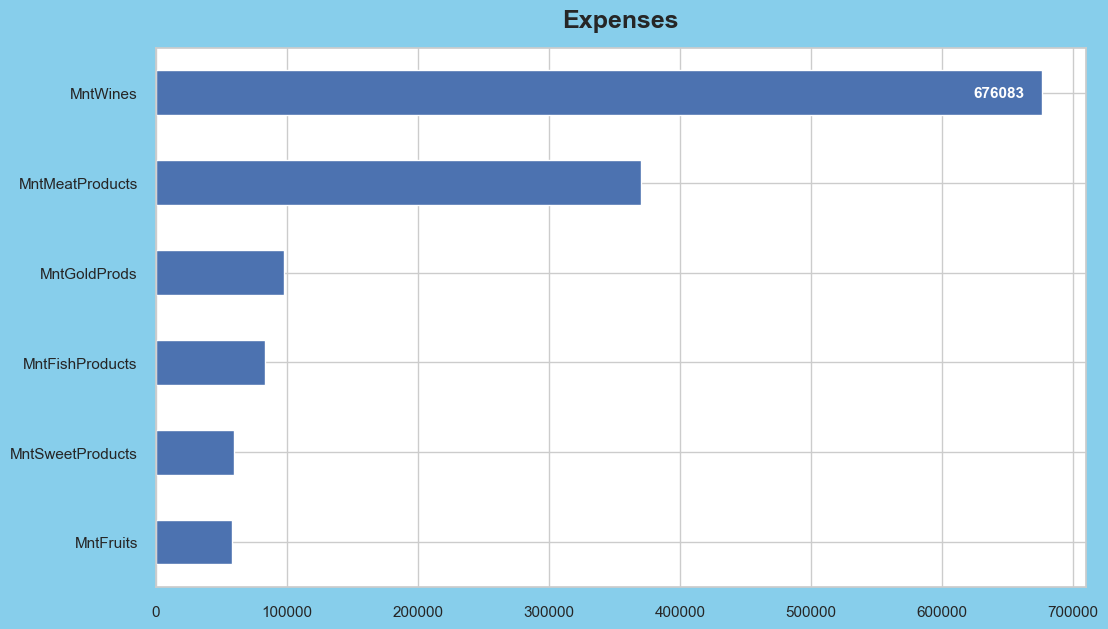

In [21]:
plt.figure(figsize=(12,7), facecolor='skyblue')
ax = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh')

plt.title('Expenses', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches

for rect in rects:
 x_value = rect.get_width()
 y_value = rect.get_y() + rect.get_height() / 2
    
plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
    textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')

<Axes: xlabel='Marital_Status', ylabel='count'>

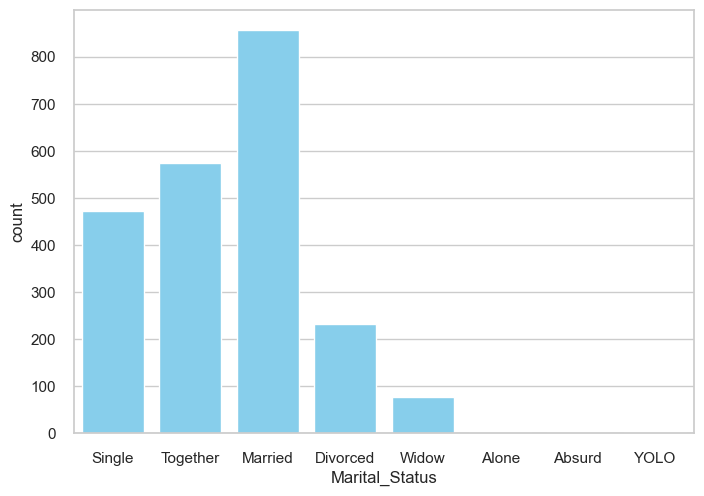

In [22]:
#countplot for a customer marital stauts
sns.countplot(x = df["Marital_Status"],facecolor='skyblue')  

<span style="color:skyblue">As we seen the above graph there most of the customer are married.

<Axes: ylabel='Density'>

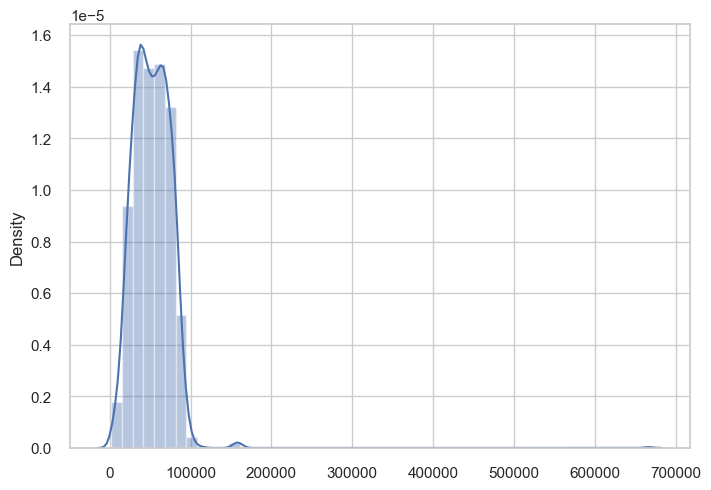

In [23]:
# distplot for the income

sns.distplot(x = df["Income"])

<span style="color:skyblue">Most of the income are between in 0 to 1 Lack.

Text(0.5, 1.0, 'Pie chart for kid avalible at home')

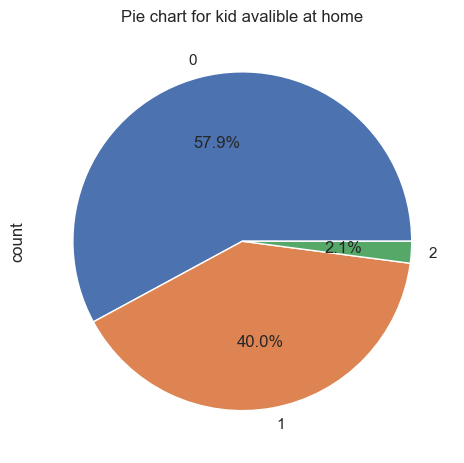

In [24]:
#pie chart for kidhome where shows percentage of kids
df['Kidhome'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title("Pie chart for kid avalible at home")

<span style="color:skyblue">Here in Pie chart where 0 is no kid were the 58% kid is not in kidhome and 1 is one kid were the 40% are in kidhome, 2 mean two kid were 2.1% are in kidhome.

In [25]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,43


In [26]:
#examining the correlation values
df.corr(numeric_only=True)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,...,-0.013070,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,0.034154,-0.021491,-0.002355
Year_Birth,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,...,-0.127891,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,-0.030407,0.023692,-1.000000
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,0.133047,0.161791
Kidhome,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,...,-0.501349,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,0.040978,-0.077909,-0.233615
Teenhome,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,...,0.049737,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,0.003307,-0.153901,0.350791
Recency,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,...,-0.000434,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,-0.199766,0.016295
MntWines,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,...,0.640012,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,0.246299,0.159451
MntFruits,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,...,0.458491,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,0.122443,0.017747
MntMeatProducts,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,...,0.486006,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,0.237746,0.033697
MntFishProducts,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,...,0.457745,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,0.108145,0.040425


<Axes: >

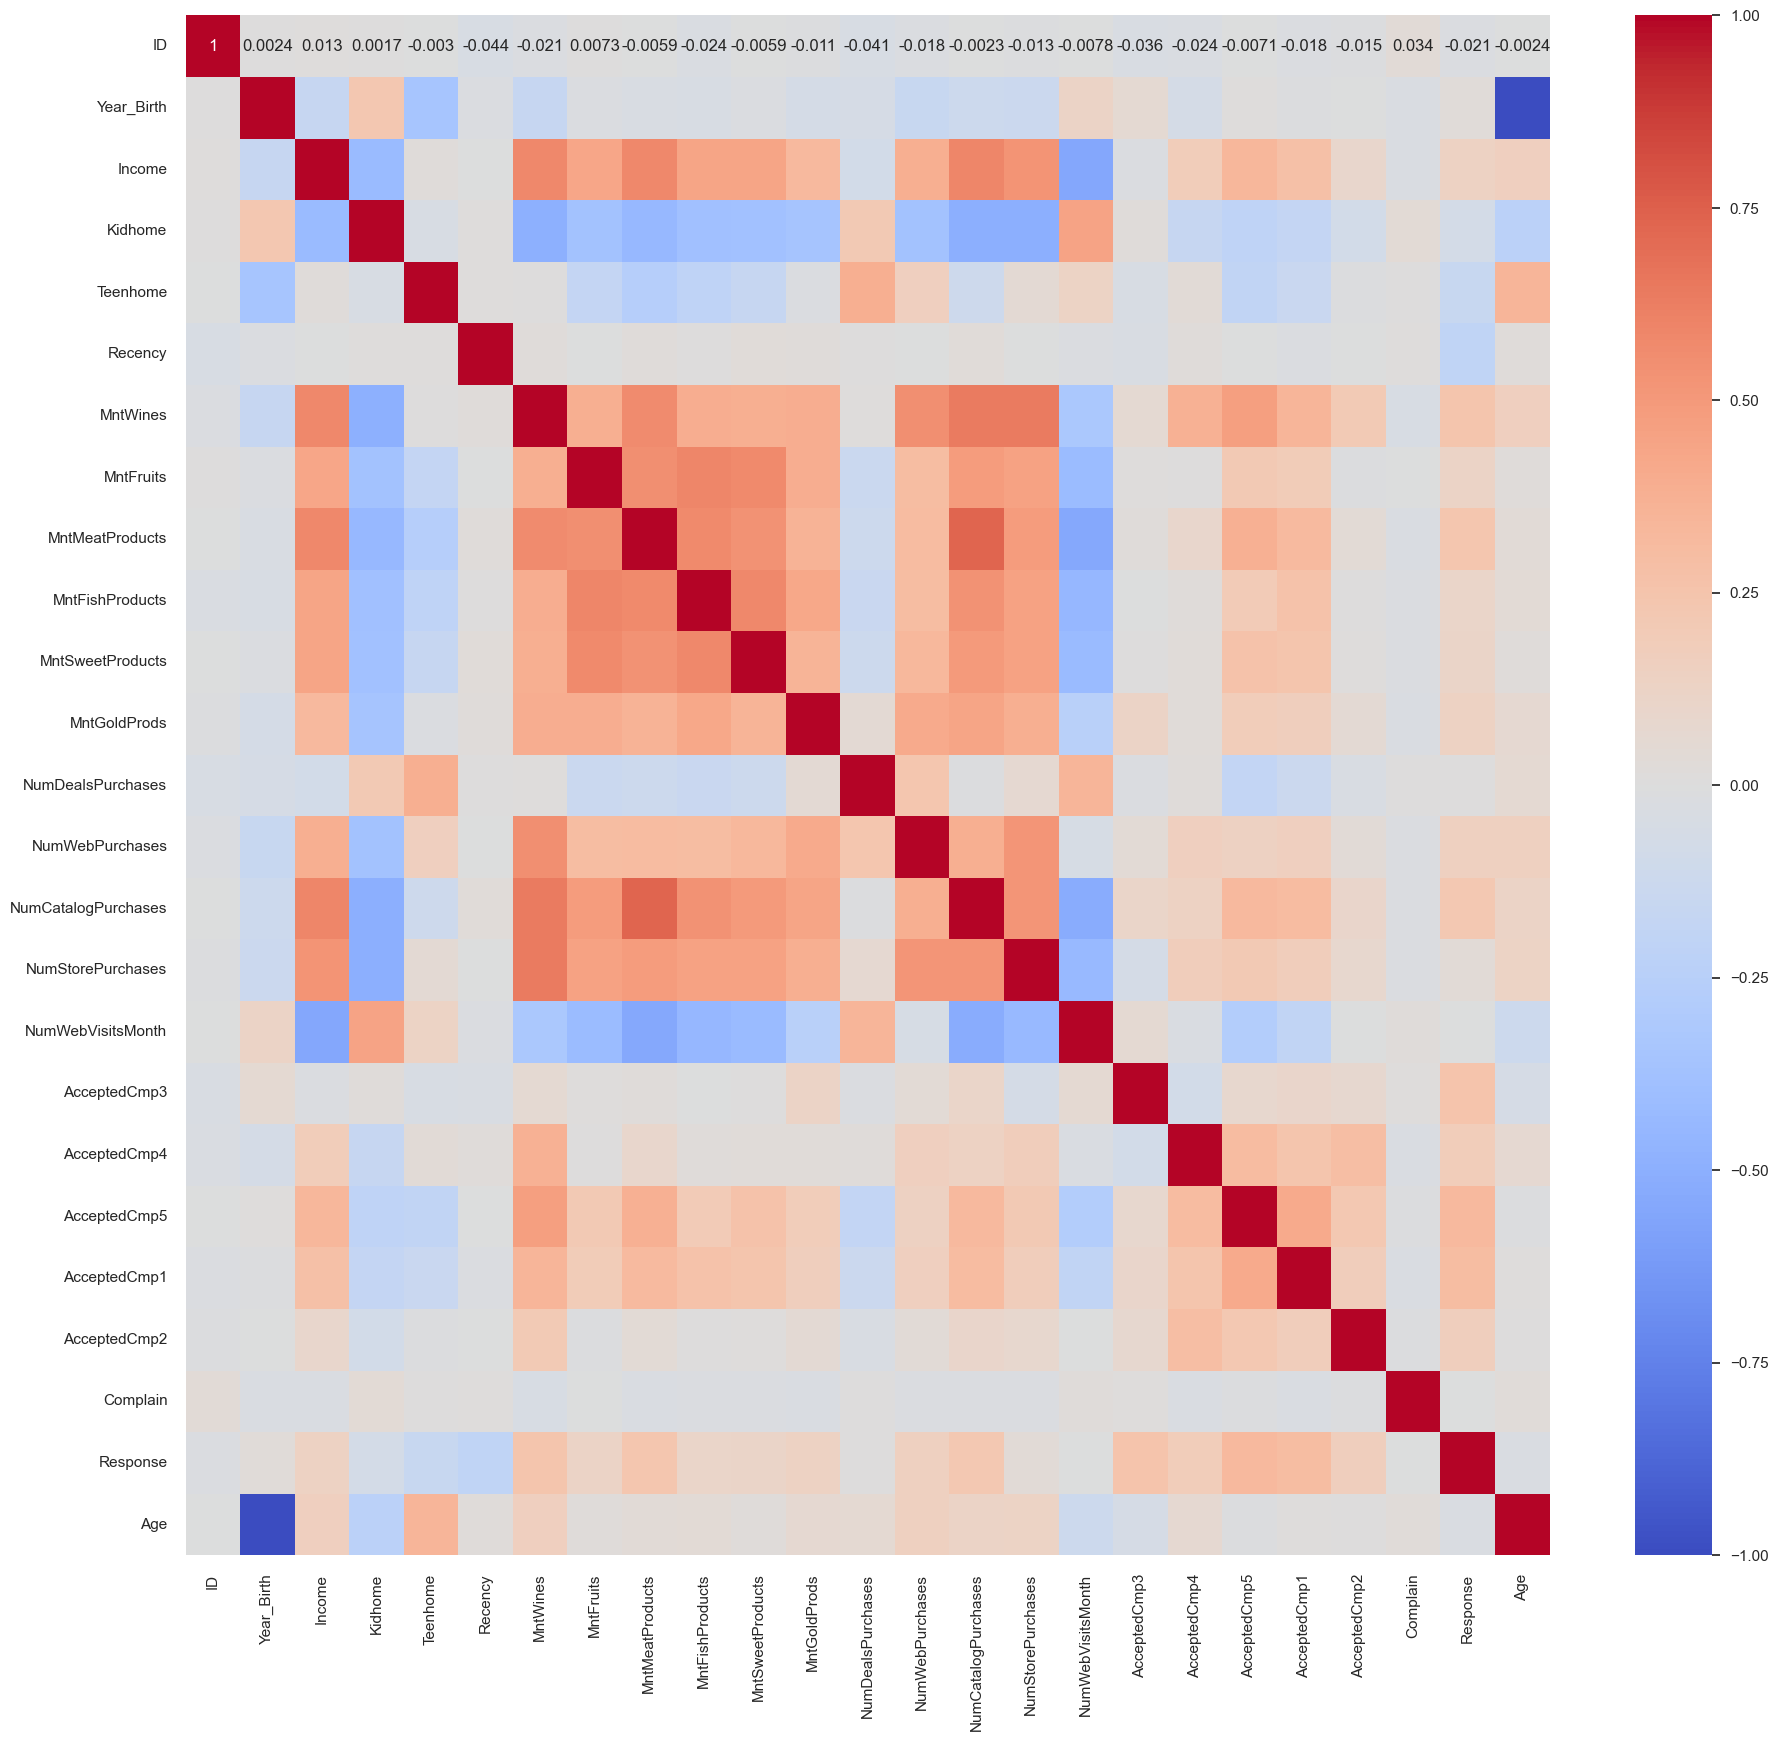

In [27]:
#examining the correlation values through a heatmap
plt.figure(figsize=(22,20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

<span style="color:skyblue">From the above heatmap observation the data says that.       
    <span style="color:skyblue">Strong Positive Correlations: Look for dark red squares along the diagonal and off-diagonal areas. These represent strong positive correlations between variables.\
        <span style="color:skyblue">Strong Negative Correlations: Look for dark blue squares, particularly off the diagonal. These represent strong negative correlations. 
            <span style="color:skyblue">Weak Correlations: Light or pastel shades of red or blue indicate weak positive or negative correlations, respectively.

In [28]:
fs = pps.matrix(df)
fs

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,ID,ID,1.0,predict_itself,True,None,0.000000,1.000000,None
1,ID,Year_Birth,0.0,regression,True,mean absolute error,9.777076,13.462545,DecisionTreeRegressor()
2,ID,Education,0.0,classification,True,weighted F1,0.341155,0.336210,DecisionTreeClassifier()
3,ID,Marital_Status,0.0,classification,True,weighted F1,0.273917,0.270563,DecisionTreeClassifier()
4,ID,Income,0.0,regression,True,mean absolute error,18123.637635,24127.977437,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
779,Age,AcceptedCmp1,0.0,regression,True,mean absolute error,0.064079,0.119201,DecisionTreeRegressor()
780,Age,AcceptedCmp2,0.0,regression,True,mean absolute error,0.013538,0.027052,DecisionTreeRegressor()
781,Age,Complain,0.0,regression,True,mean absolute error,0.009477,0.019914,DecisionTreeRegressor()
782,Age,Response,0.0,regression,True,mean absolute error,0.150271,0.251423,DecisionTreeRegressor()


In [29]:
fs[fs['y'] == 'Income']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
4,ID,Income,0.000000,regression,True,mean absolute error,18123.637635,24127.977437,DecisionTreeRegressor()
32,Year_Birth,Income,0.026556,regression,True,mean absolute error,18123.637635,17642.341823,DecisionTreeRegressor()
60,Education,Income,0.013814,regression,True,mean absolute error,18123.637635,17873.277929,DecisionTreeRegressor()
88,Marital_Status,Income,0.000000,regression,True,mean absolute error,18123.637635,18126.901268,DecisionTreeRegressor()
116,Income,Income,1.000000,predict_itself,True,None,0.000000,1.000000,None
144,Kidhome,Income,0.224534,regression,True,mean absolute error,18123.637635,14054.267298,DecisionTreeRegressor()
172,Teenhome,Income,0.000000,regression,True,mean absolute error,18123.637635,18144.852635,DecisionTreeRegressor()
200,Dt_Customer,Income,0.000000,regression,True,mean absolute error,18123.637635,20577.020539,DecisionTreeRegressor()
228,Recency,Income,0.000000,regression,True,mean absolute error,18123.637635,18364.803025,DecisionTreeRegressor()
256,MntWines,Income,0.381724,regression,True,mean absolute error,18123.637635,11205.401323,DecisionTreeRegressor()


In [30]:
#predictive power score of case: classification
fs[fs['case'] == 'classification'].sort_values(by = 'ppscore', ascending = False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
254,MntWines,Education,0.158955,classification,True,weighted F1,0.341155,0.445882,DecisionTreeClassifier()
114,Income,Education,0.158837,classification,True,weighted F1,0.341155,0.445804,DecisionTreeClassifier()
115,Income,Marital_Status,0.152338,classification,True,weighted F1,0.273917,0.384527,DecisionTreeClassifier()
338,MntFishProducts,Education,0.106258,classification,True,weighted F1,0.341155,0.411163,DecisionTreeClassifier()
310,MntMeatProducts,Education,0.086914,classification,True,weighted F1,0.341155,0.398418,DecisionTreeClassifier()
198,Dt_Customer,Education,0.084350,classification,True,weighted F1,0.341155,0.396729,DecisionTreeClassifier()
282,MntFruits,Education,0.072428,classification,True,weighted F1,0.341155,0.388874,DecisionTreeClassifier()
311,MntMeatProducts,Marital_Status,0.059272,classification,True,weighted F1,0.273917,0.316953,DecisionTreeClassifier()
394,MntGoldProds,Education,0.056411,classification,True,weighted F1,0.341155,0.378321,DecisionTreeClassifier()
366,MntSweetProducts,Education,0.054480,classification,True,weighted F1,0.341155,0.377049,DecisionTreeClassifier()


<span style="color:skyblue">Income and Marital_Status have a higest pps.      

In [31]:
fs[fs['case'] == 'regression'].sort_values(by = 'ppscore', ascending = False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
55,Year_Birth,Age,0.999354,regression,True,mean absolute error,9.777076,0.006318,DecisionTreeRegressor()
757,Age,Year_Birth,0.999354,regression,True,mean absolute error,9.777076,0.006318,DecisionTreeRegressor()
485,NumCatalogPurchases,MntWines,0.434366,regression,True,mean absolute error,260.606949,147.408226,DecisionTreeRegressor()
480,NumCatalogPurchases,Income,0.431423,regression,True,mean absolute error,18123.637635,10304.686573,DecisionTreeRegressor()
312,MntMeatProducts,Income,0.408392,regression,True,mean absolute error,18123.637635,10722.093314,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
250,Recency,Response,0.000000,regression,True,mean absolute error,0.150271,0.242691,DecisionTreeRegressor()
249,Recency,Complain,0.000000,regression,True,mean absolute error,0.009477,0.019653,DecisionTreeRegressor()
248,Recency,AcceptedCmp2,0.000000,regression,True,mean absolute error,0.013538,0.026829,DecisionTreeRegressor()
247,Recency,AcceptedCmp1,0.000000,regression,True,mean absolute error,0.064079,0.117662,DecisionTreeRegressor()


<span style="color:skyblue">Age and Year_birth have a higest pps.      

<Axes: xlabel='Income', ylabel='MntFishProducts'>

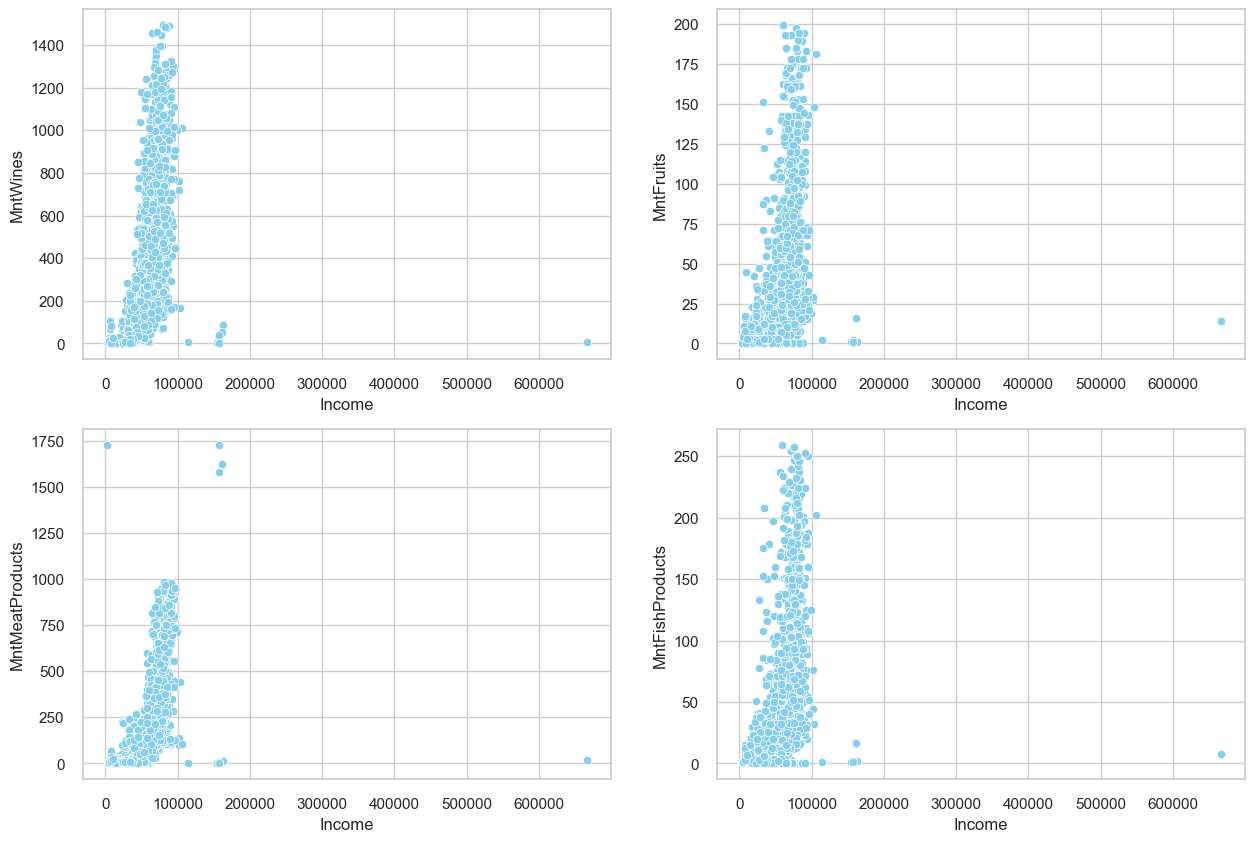

In [32]:
#visualizing the distribution of the columns

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(data = df, x = "Income", y = "MntWines", color='skyblue' )

plt.subplot(2,2,2)
sns.scatterplot(data = df, x = "Income", y = "MntFruits", color='skyblue' )

plt.subplot(2,2,3)
sns.scatterplot(data = df, x = "Income", y = "MntMeatProducts", color='skyblue' )

plt.subplot(2,2,4)
sns.scatterplot(data = df, x = "Income", y = "MntFishProducts", color='skyblue' )


<span style="color:skyblue">As we see scatterplot they all are normally distrubtuted.      

<BarContainer object of 4 artists>

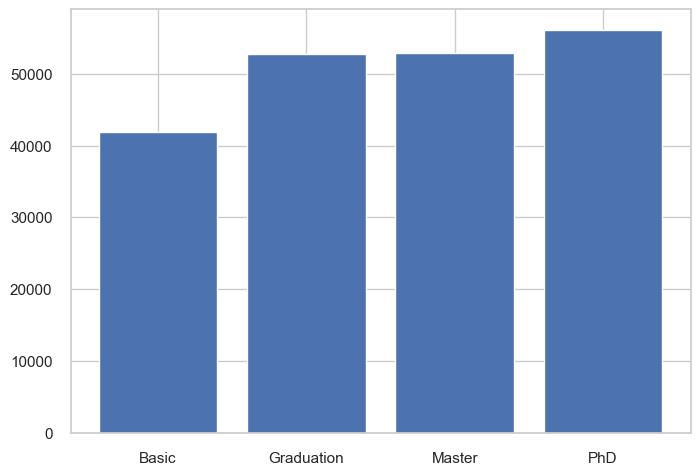

In [33]:
# barplot base on Income and Education

ei = df.groupby("Education")["Income"].mean()

plt.bar(ei.index, height=round(ei,2))


<span style="color:skyblue">As we see barplot base on Income what is education and PhD customer had a higest income and basic had a lowest income.      

In [34]:
df["Total_spent"] = df['MntWines'] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [35]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [36]:
# Count of different values present in Marital_Status
df['Marital_Status'].value_counts()

Marital_Status
Relationship    1430
Single           786
Name: count, dtype: int64

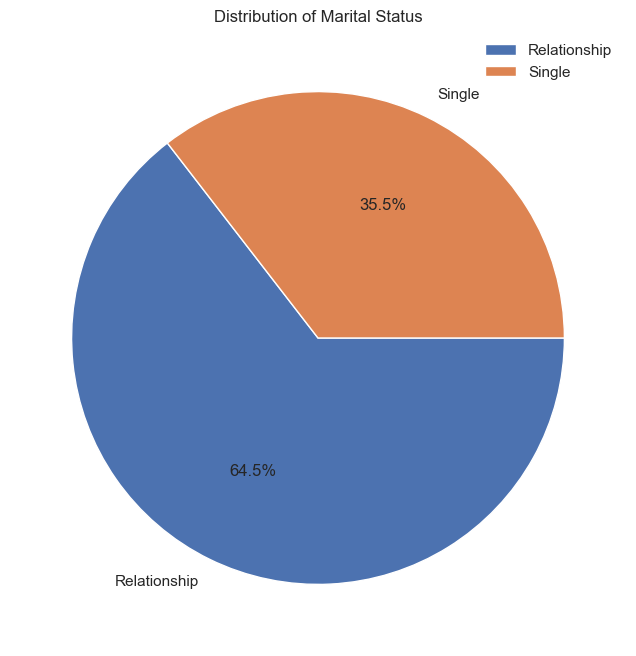

In [37]:
# pie chart for distribution of Marital Status

plt.figure(figsize=(10,8))
plt.pie(df["Marital_Status"].value_counts(), labels = ["Relationship", "Single"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.title("Distribution of Marital Status")
plt.show()

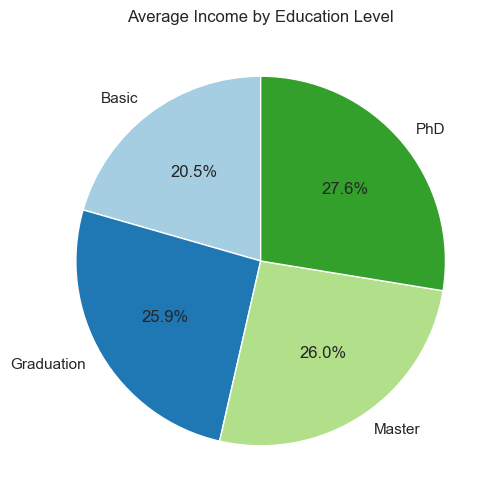

In [38]:
# comparison of income wrt education level

education_income = df.groupby('Education')['Income'].mean().reset_index()

# Plotting a pie chart
plt.figure(figsize=(10, 6))
plt.pie(education_income['Income'], labels=education_income['Education'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Average Income by Education Level')
plt.show()


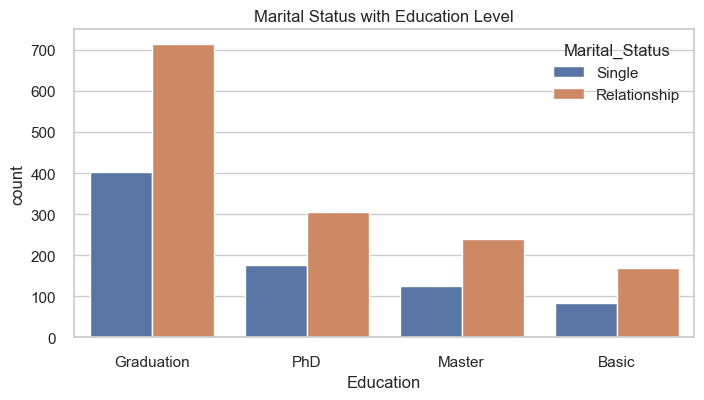

In [39]:
# Countplot for Marital Status wrt Educational Background

plt.figure(figsize=(8, 4))
sns.countplot(x='Education', hue='Marital_Status', data=df)
plt.title('Marital Status with Education Level')
plt.show()

**<span style="color:darkbrown">DATA TRANSFORMATION**

In [40]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,1,67,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,0,70,27
2,4141,1965,Graduation,Relationship,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,59,776
3,6182,1984,Graduation,Relationship,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,0,40,53
4,5324,1981,PhD,Relationship,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,43,422


In [41]:
categorical_columns = []

for i in df.columns:
    if (df[i].dtypes == "object"):
        categorical_columns.append(i)

In [42]:
categorical_columns

['Education', 'Marital_Status']

In [43]:
#label encoding

lb = LabelEncoder()

df["Education"] = lb.fit_transform(df["Education"])
df["Marital_Status"] = lb.fit_transform(df["Marital_Status"])

In [44]:
df["Education"]

0       1
1       1
2       1
3       1
4       3
       ..
2235    1
2236    3
2237    1
2238    2
2239    3
Name: Education, Length: 2216, dtype: int32

In [45]:
df["Marital_Status"]

0       1
1       1
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Name: Marital_Status, Length: 2216, dtype: int32

In [46]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])  # Assuming 'datetime_column' is the column name
#df['Dt_Customer'] = df['Dt_Customer'].dt.timestamp()


In [47]:
df['year'] = pd.to_datetime(df['Dt_Customer']).dt.year
df['month'] = pd.to_datetime(df['Dt_Customer']).dt.month
# ... similar for day, hour, etc.


In [48]:
df = df.drop('Dt_Customer', axis=1)  # Assuming 'datetime_column' is the column name


In [49]:
# Min-Max Scaling
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = scaler_minmax.fit_transform(df)

# Standardization
scaler_standard = StandardScaler()
data_scaled_standard = scaler_standard.fit_transform(df)

In [50]:
df1 = df.copy()
to_drop = ["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain","Response"]
df1 = df1.drop(to_drop, axis=1)

**<span style="color:darkbrown">OUTLIER DETECTION**

In [51]:
# Iterate over each column and create a boxplot
# for column in df1.columns:
#    if df1[column].dtype != 'datetime64[ns]':
#        plt.figure()  # Create a new figure for each boxplot
#        plt.boxplot(df[column])
#        plt.title(f'Boxplot for {column}')
#        plt.xlabel('Values')
#        plt.ylabel('Column')
#        plt.show()

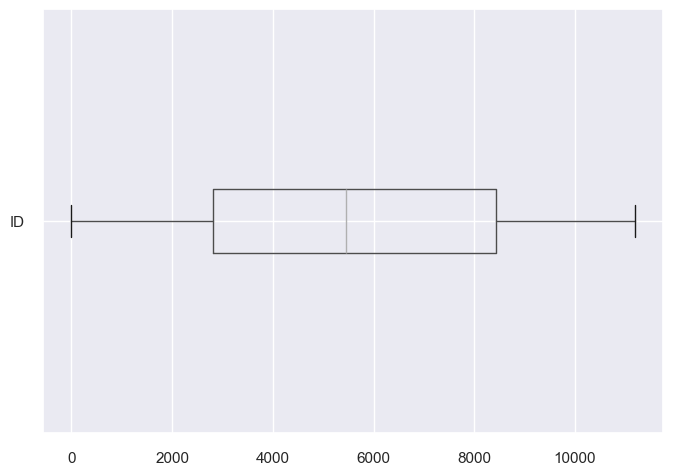

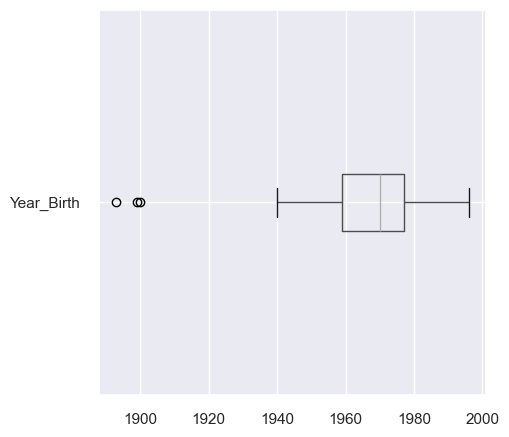

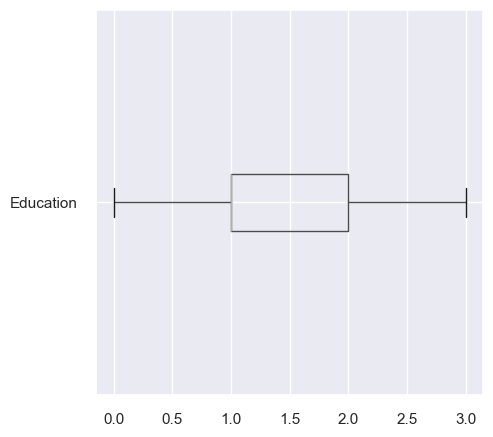

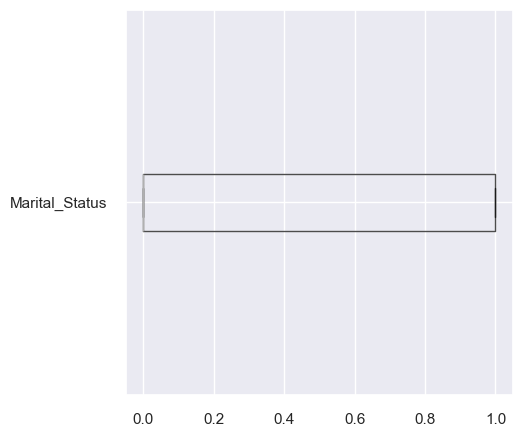

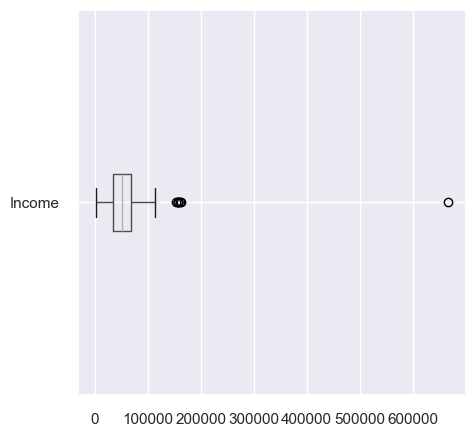

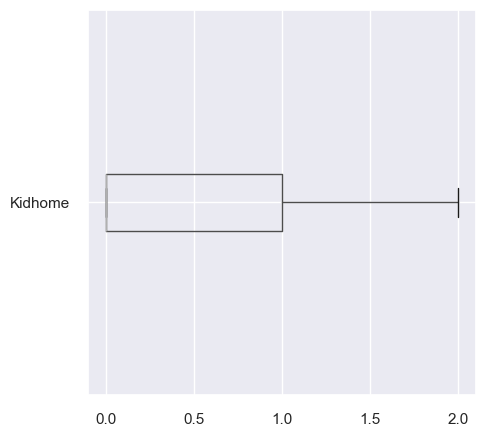

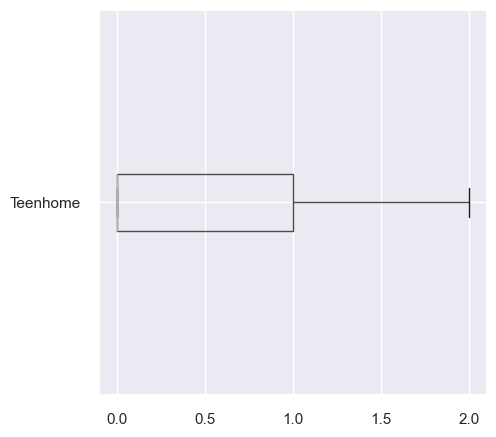

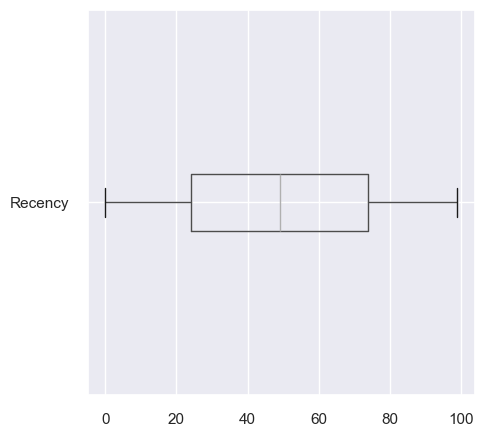

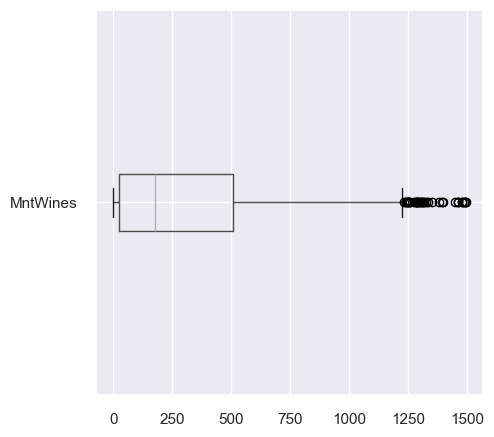

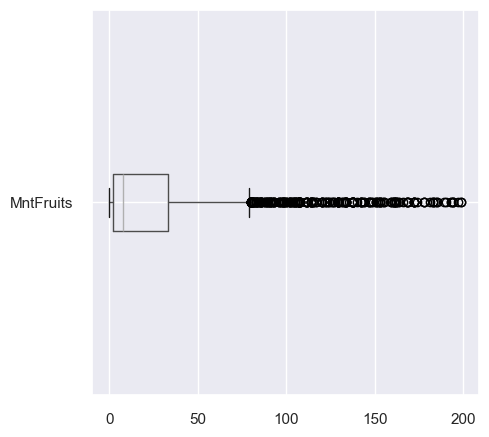

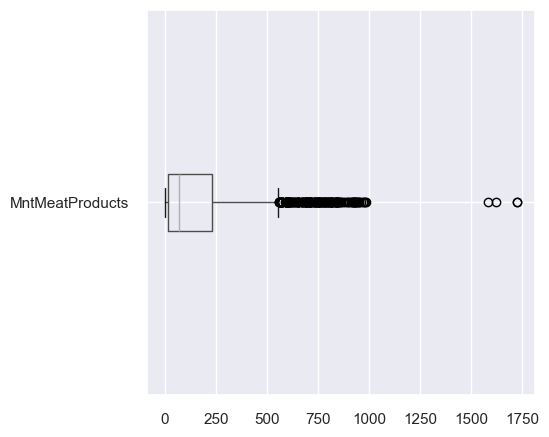

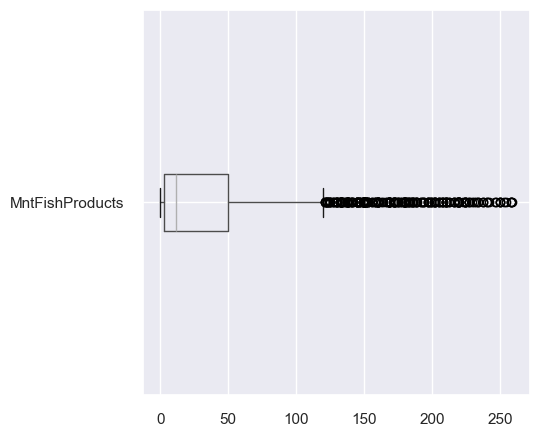

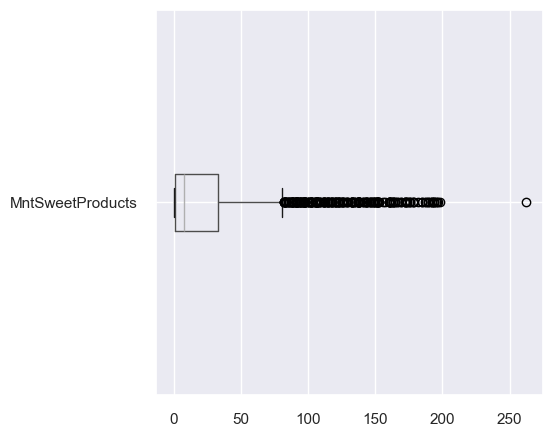

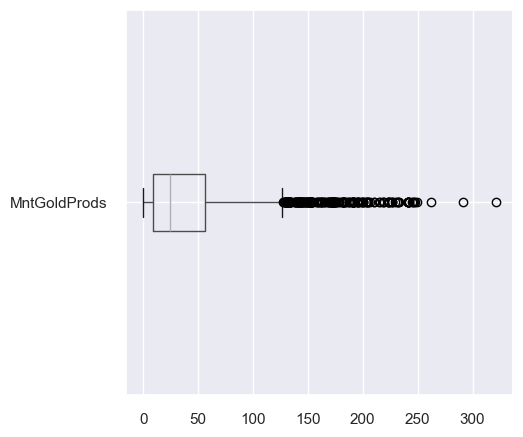

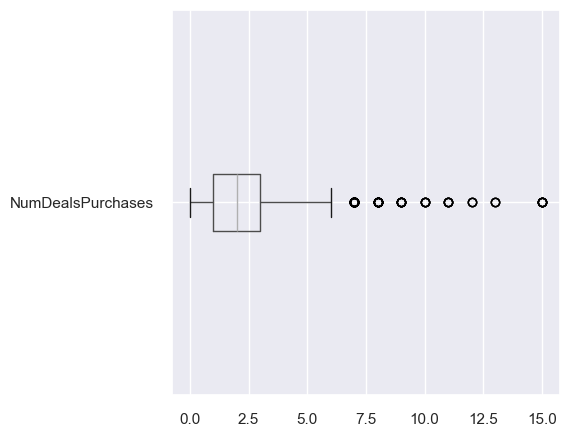

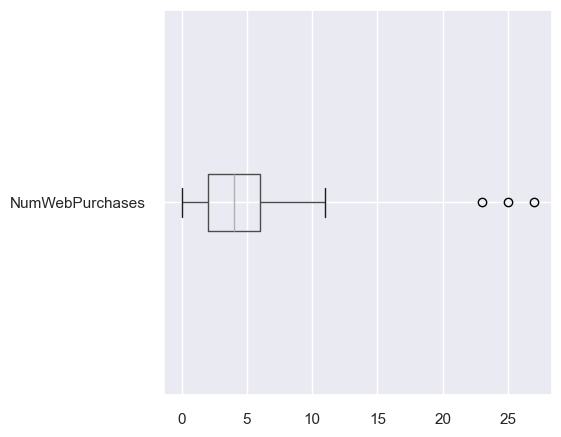

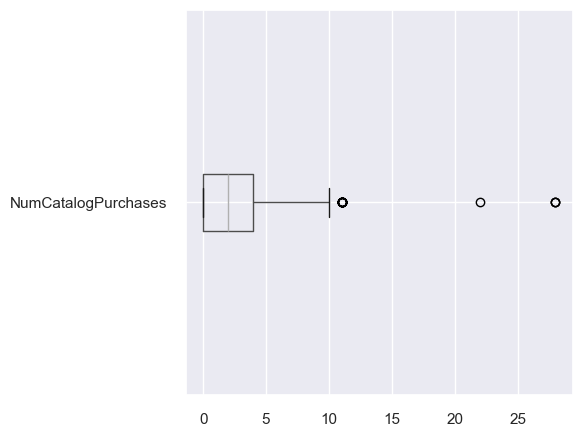

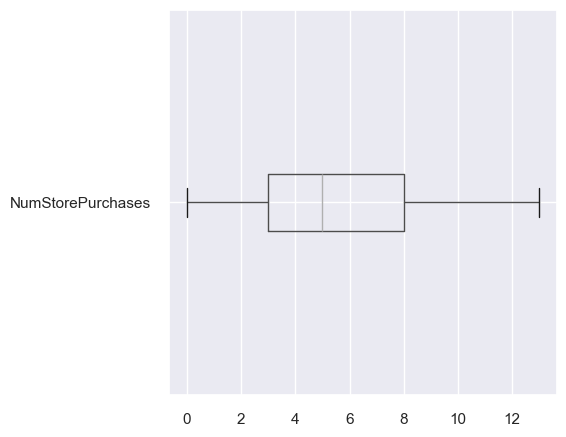

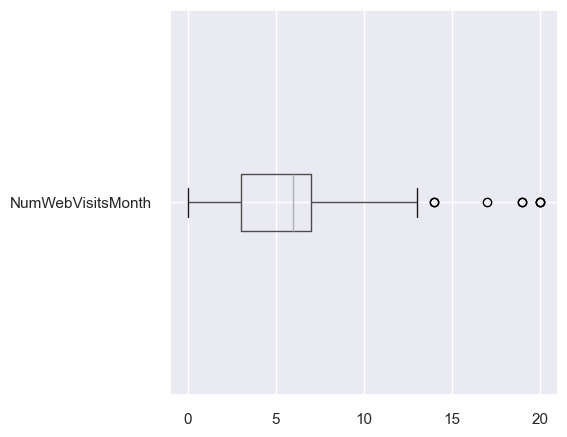

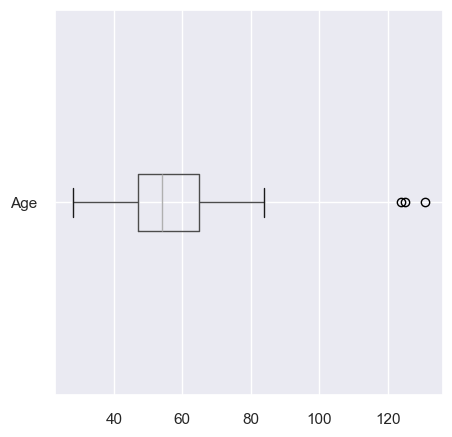

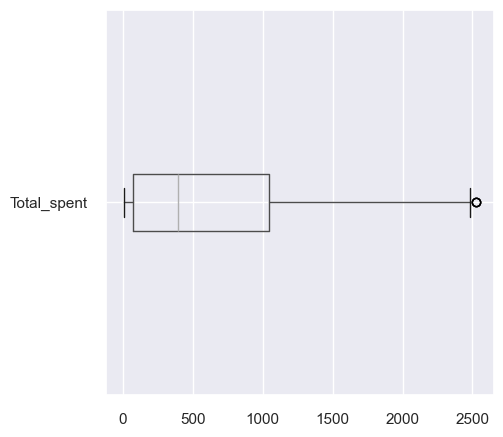

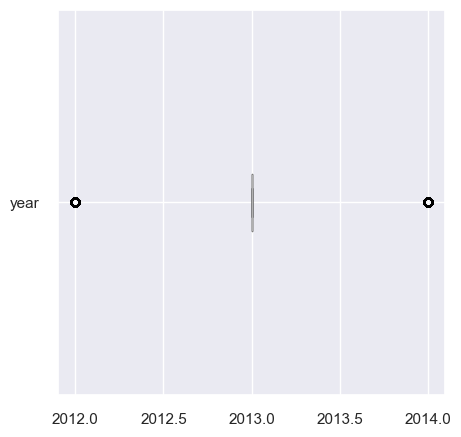

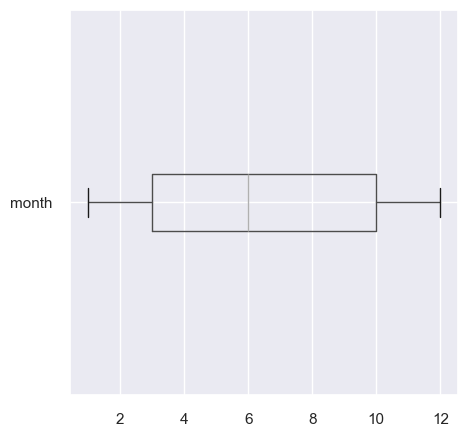

In [52]:
#boxplots for each column
for column in df1:
    plt.figure()
    sns.set(rc = {'figure.figsize':(5,5)})
    df.boxplot([column],vert = False)

In [53]:
iso = IsolationForest()

iso.fit(df1)

IsolationForest()

In [54]:
# Fitting the Isolation Forest model
iso = IsolationForest()
iso.fit(df1)

# Predicting outliers
outlier = iso.predict(df1)
outlier

array([-1,  1,  1, ..., -1,  1,  1])

In [55]:
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,year,month
0,5524,1957,1,1,58138.0,0,0,58,635,88,...,88,3,8,10,4,7,67,1617,2012,9
1,2174,1954,1,1,46344.0,1,1,38,11,1,...,6,2,1,1,2,5,70,27,2014,3
2,4141,1965,1,0,71613.0,0,0,26,426,49,...,42,1,8,2,10,4,59,776,2013,8
3,6182,1984,1,0,26646.0,1,0,26,11,4,...,5,2,2,0,4,6,40,53,2014,2
4,5324,1981,3,0,58293.0,1,0,94,173,43,...,15,5,5,3,6,5,43,422,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,0,61223.0,0,1,46,709,43,...,247,2,9,3,4,5,57,1341,2013,6
2236,4001,1946,3,0,64014.0,2,1,56,406,0,...,8,7,8,2,5,7,78,444,2014,6
2237,7270,1981,1,1,56981.0,0,0,91,908,48,...,24,1,2,3,13,6,43,1241,2014,1
2238,8235,1956,2,0,69245.0,0,1,8,428,30,...,61,2,6,5,10,3,68,843,2014,1


In [56]:
# Verify if 'outlier' column exists (optional, for clarity)
if 'outlier' not in df1.columns:
    print("Column 'outlier' not found in the DataFrame. Adding it now.")
    df1['outlier'] = outlier

# Filter the DataFrame based on the correct column name
try:
    df_filtered = df1[df1['outlier'] == 1]  # Assuming 1 indicates outliers (adjust if different)
except KeyError:
    print("Column 'outlier' might not exist. Check your code for adding outlier predictions.")

# Proceed with your clustering analysis using df_filtered (if successful)

Column 'outlier' not found in the DataFrame. Adding it now.


In [57]:
outlier = df1['outlier']

In [58]:
df1['outlier'].value_counts()

outlier
 1    1710
-1     506
Name: count, dtype: int64

In [59]:
df1[df1['outlier'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,year,month,outlier
1,2174,1954,1,1,46344.0,1,1,38,11,1,...,2,1,1,2,5,70,27,2014,3,1
2,4141,1965,1,0,71613.0,0,0,26,426,49,...,1,8,2,10,4,59,776,2013,8,1
3,6182,1984,1,0,26646.0,1,0,26,11,4,...,2,2,0,4,6,40,53,2014,2,1
4,5324,1981,3,0,58293.0,1,0,94,173,43,...,5,5,3,6,5,43,422,2014,1,1
5,7446,1967,2,0,62513.0,0,1,16,520,42,...,2,6,4,10,6,57,716,2013,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,9432,1977,1,0,666666.0,1,0,23,9,14,...,4,3,1,3,6,47,62,2013,6,1
2234,8372,1974,1,0,34421.0,1,0,81,3,3,...,1,1,0,2,7,50,30,2013,7,1
2235,10870,1967,1,0,61223.0,0,1,46,709,43,...,2,9,3,4,5,57,1341,2013,6,1
2238,8235,1956,2,0,69245.0,0,1,8,428,30,...,2,6,5,10,3,68,843,2014,1,1


In [60]:
df1[df1['outlier'] == -1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,year,month,outlier
0,5524,1957,1,1,58138.0,0,0,58,635,88,...,3,8,10,4,7,67,1617,2012,9,-1
9,5899,1950,3,0,5648.0,1,1,68,28,0,...,1,1,0,0,20,74,49,2014,3,-1
15,2114,1946,3,1,82800.0,0,0,23,1006,22,...,1,7,6,12,3,78,1315,2012,11,-1
18,6565,1949,2,0,76995.0,0,1,91,1012,80,...,2,11,4,9,5,75,1782,2013,3,-1
21,5376,1979,1,0,2447.0,1,0,42,1,1,...,15,0,28,0,1,45,1730,2013,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,1092,1980,1,0,61014.0,0,1,17,269,129,...,4,9,3,4,7,44,1147,2012,8,-1
2213,3661,1995,0,1,80617.0,0,0,42,594,51,...,1,4,6,8,2,29,1435,2012,10,-1
2217,9589,1948,3,1,82032.0,0,0,54,332,194,...,0,4,6,7,1,76,1234,2014,4,-1
2236,4001,1946,3,0,64014.0,2,1,56,406,0,...,7,8,2,5,7,78,444,2014,6,-1


In [61]:
df1.drop(columns=['outlier','outlier'],inplace=True)

In [62]:
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,year,month
0,5524,1957,1,1,58138.0,0,0,58,635,88,...,88,3,8,10,4,7,67,1617,2012,9
1,2174,1954,1,1,46344.0,1,1,38,11,1,...,6,2,1,1,2,5,70,27,2014,3
2,4141,1965,1,0,71613.0,0,0,26,426,49,...,42,1,8,2,10,4,59,776,2013,8
3,6182,1984,1,0,26646.0,1,0,26,11,4,...,5,2,2,0,4,6,40,53,2014,2
4,5324,1981,3,0,58293.0,1,0,94,173,43,...,15,5,5,3,6,5,43,422,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,0,61223.0,0,1,46,709,43,...,247,2,9,3,4,5,57,1341,2013,6
2236,4001,1946,3,0,64014.0,2,1,56,406,0,...,8,7,8,2,5,7,78,444,2014,6
2237,7270,1981,1,1,56981.0,0,0,91,908,48,...,24,1,2,3,13,6,43,1241,2014,1
2238,8235,1956,2,0,69245.0,0,1,8,428,30,...,61,2,6,5,10,3,68,843,2014,1


In [63]:
#removing the outliers using IQR
#Outlier detection function

def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3 - q1
    
    upper = q3+(1.5*iqr)
    lower = q1+(1.5*iqr)
    
    return upper,lower
    

In [64]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Remove outliers using the custom IQR multiplier for each column
upper = df1[~(df1 > (Q3 + 1.5 * IQR)).any(axis=1)]
lower = df1[~(df1 < (Q1 - 1.5 * IQR)).any(axis=1)] 


# Display the DataFrame after removing outliers

ds = pd.DataFrame(lower)
dss = pd.DataFrame(upper)
ds
dss

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,year,month
2,4141,1965,1,0,71613.0,0,0,26,426,49,...,42,1,8,2,10,4,59,776,2013,8
5,7446,1967,2,0,62513.0,0,1,16,520,42,...,14,2,6,4,10,6,57,716,2013,9
6,965,1971,1,1,55635.0,0,1,34,235,65,...,27,4,7,3,7,6,53,590,2012,11
7,6177,1985,3,0,33454.0,1,0,32,76,10,...,23,2,4,0,4,8,39,169,2013,5
8,4855,1974,3,0,30351.0,1,0,19,14,0,...,2,1,3,0,2,9,50,46,2013,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,7004,1984,1,1,11012.0,1,0,82,24,3,...,23,3,3,1,2,9,40,84,2013,3
2231,9817,1970,2,1,44802.0,0,0,71,853,10,...,20,2,9,4,12,8,54,1049,2012,8
2232,8080,1986,1,1,26816.0,0,0,50,5,1,...,3,1,0,0,3,4,38,22,2012,8
2234,8372,1974,1,0,34421.0,1,0,81,3,3,...,9,1,1,0,2,7,50,30,2013,7


In [65]:
#EDA report

#EDA_report = pp.ProfileReport(df1, vars = dict(num= {"low_categorical_threshold" : 0}))
#EDA_report

In [66]:
#report = sv.analyze(df1)

In [67]:
#report

In [68]:
#report.show_html('sweetviz.html')

**<span style="color:darkbrown">PCA**

In [69]:
# Standardization
scaler_standard = StandardScaler()
das = scaler_standard.fit_transform(df1)

In [70]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Education,2216.0,1.484206,0.955782,0.0,1.00,1.0,2.00,3.0
Marital_Status,2216.0,0.354693,0.478528,0.0,0.00,0.0,1.00,1.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0


In [71]:
das.T

array([[-0.0198093 , -1.05100909, -0.44552551, ...,  0.51764587,
         0.81469298,  1.17484335],
       [-0.98644293, -1.23680074, -0.31882209, ...,  1.01641959,
        -1.06989553, -1.23680074],
       [-0.506721  , -0.506721  , -0.506721  , ..., -0.506721  ,
         0.53977829,  1.58627758],
       ...,
       [ 1.67548812, -0.96235832,  0.28024985, ...,  1.05169551,
         0.39140438, -0.7218    ],
       [-1.50034282,  1.41739276, -0.04147503, ...,  1.41739276,
         1.41739276, -1.50034282],
       [ 0.72650098, -0.99319941,  0.43988425, ..., -1.56643287,
        -1.56643287,  1.01311772]])

In [72]:
cov = np.cov(das.T) 
cov

array([[ 1.00045147e+00,  2.35629344e-03, -5.26629680e-03,
        -1.79288649e-02,  1.31013955e-02,  1.73698052e-03,
        -3.03116918e-03, -4.43959989e-02, -2.10930417e-02,
         7.32958242e-03, -5.90480100e-03, -2.40028722e-02,
        -5.93887560e-03, -1.11769288e-02, -4.06298415e-02,
        -1.84845949e-02, -2.27526910e-03, -1.30755644e-02,
        -7.79735801e-03, -2.35629344e-03, -1.70595543e-02,
        -5.07363028e-03,  1.86213377e-02],
       [ 2.35629344e-03,  1.00045147e+00, -1.75978589e-01,
        -2.03430866e-03, -1.61864472e-01,  2.33720086e-01,
        -3.50948943e-01, -1.63022563e-02, -1.59523083e-01,
        -1.77545322e-02, -3.37119584e-02, -4.04433348e-02,
        -2.02135366e-02, -6.42366809e-02, -5.86945376e-02,
        -1.53120472e-01, -1.21818944e-01, -1.27948460e-01,
         1.23959875e-01, -1.00045147e+00, -1.13538074e-01,
        -2.73000323e-02,  2.61452677e-02],
       [-5.26629680e-03, -1.75978589e-01,  1.00045147e+00,
         1.02845214e-02,  1.2

In [73]:
values,vectors = np.linalg.eig(cov)

In [74]:
values

array([7.01665206e+00+0.0000000e+00j, 2.49577875e+00+0.0000000e+00j,
       1.94233376e+00+0.0000000e+00j, 1.34921496e+00+0.0000000e+00j,
       1.18059175e+00+0.0000000e+00j, 1.05102374e+00+0.0000000e+00j,
       1.00474765e+00+0.0000000e+00j, 9.49325195e-01+0.0000000e+00j,
       7.84924687e-01+0.0000000e+00j, 7.39134503e-01+0.0000000e+00j,
       6.55110276e-01+0.0000000e+00j, 6.05533008e-01+0.0000000e+00j,
       2.15336042e-01+0.0000000e+00j, 2.46682762e-01+0.0000000e+00j,
       2.74970031e-01+0.0000000e+00j, 4.91625276e-01+0.0000000e+00j,
       3.39468810e-01+0.0000000e+00j, 4.55075196e-01+0.0000000e+00j,
       4.31172104e-01+0.0000000e+00j, 3.95235081e-01+0.0000000e+00j,
       3.86448114e-01+0.0000000e+00j, 4.74706986e-17+2.0292916e-17j,
       4.74706986e-17-2.0292916e-17j])

In [75]:
vectors

array([[ 4.09738345e-03+0.00000000e+00j,  1.18308751e-02+0.00000000e+00j,
        -1.81409700e-02+0.00000000e+00j,  9.76215544e-02+0.00000000e+00j,
         8.07981207e-02+0.00000000e+00j, -6.88587590e-01+0.00000000e+00j,
        -2.97848310e-02+0.00000000e+00j, -7.05613425e-01+0.00000000e+00j,
         6.84742590e-02+0.00000000e+00j, -4.88879885e-02+0.00000000e+00j,
        -7.63638330e-03+0.00000000e+00j, -6.14465115e-03+0.00000000e+00j,
         1.28240779e-02+0.00000000e+00j,  9.93730364e-03+0.00000000e+00j,
        -1.38785635e-02+0.00000000e+00j, -2.69715305e-02+0.00000000e+00j,
         9.05575024e-03+0.00000000e+00j, -2.54024863e-02+0.00000000e+00j,
         2.05623398e-02+0.00000000e+00j, -2.92863034e-02+0.00000000e+00j,
        -1.26343561e-02+0.00000000e+00j,  1.11909877e-17+9.17381998e-20j,
         1.11909877e-17-9.17381998e-20j],
       [ 7.15131570e-02+0.00000000e+00j,  5.24204018e-01+0.00000000e+00j,
         2.12014584e-01+0.00000000e+00j, -2.90161883e-01+0.00000000e+0

In [76]:
vectors[:,0]

array([ 0.00409738+0.j,  0.07151316+0.j, -0.02186106+0.j, -0.00800092+0.j,
       -0.28038312+0.j,  0.25056978+0.j,  0.04020653+0.j, -0.00616156+0.j,
       -0.29616207+0.j, -0.26119883+0.j, -0.30646127+0.j, -0.27065883+0.j,
       -0.26076373+0.j, -0.21813613+0.j,  0.04071175+0.j, -0.21233841+0.j,
       -0.30931313+0.j, -0.28150044+0.j,  0.23654419+0.j, -0.07151316+0.j,
       -0.35804258+0.j,  0.03919401+0.j, -0.01095519+0.j])

In [77]:
pc1 = das@vectors[:,0]
pc1

array([-4.31182263+0.j,  2.4484122 +0.j, -1.8607738 +0.j, ...,
       -1.45213786+0.j, -2.0607755 +0.j,  1.80541645+0.j])

In [78]:
pc2 = das@vectors[:,1]
pc2

array([-0.07685758+0.j, -1.34634648+0.j,  0.11620862+0.j, ...,
        1.57837647+0.j, -1.63266729+0.j, -2.32137909+0.j])

In [79]:
pca = PCA(n_components=23)  # Specify the number of components (if not already set)
pcs = pd.DataFrame(pca.fit_transform(das))


In [80]:
pcs = pd.DataFrame(pca.fit_transform(das))


In [81]:
transformed_data = pca.fit_transform(das)
print(transformed_data.shape)  # This will print (2216, n_components) where n_components is the number of PCs


(2216, 23)


In [82]:
pcs

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,4.311823,0.076858,1.572678,1.448696,-1.233415,-0.632973,1.193184,-0.374011,1.937621,-1.083715,...,1.207029,0.056093,0.030487,1.002244,-0.350643,0.130910,0.673412,0.152823,-2.704124e-17,2.624414e-16
1,-2.448412,1.346346,-2.274497,0.080900,-0.959262,-0.886754,1.302051,0.475043,0.476893,0.758092,...,0.391585,-0.313615,0.155579,-0.217598,-0.280839,-0.017309,0.139076,-0.015572,7.584093e-15,3.162370e-15
2,1.860774,-0.116209,-0.034900,0.363553,-0.310836,0.620731,-0.216185,1.253077,-0.800354,-0.601710,...,-0.897122,0.041665,0.050092,1.326398,0.167591,0.055771,0.083561,-0.109928,4.232294e-16,-7.997541e-16
3,-2.829739,-1.995178,-1.147428,-1.401169,-0.063173,0.789626,-0.266416,0.467609,0.180113,-0.350656,...,-0.417706,0.139085,0.049469,-0.042424,-0.195463,-0.001046,-0.036643,-0.056058,9.065375e-16,5.086579e-16
4,-0.502373,-0.919845,-0.769679,-2.535635,0.760675,-1.020917,-1.252308,-0.893568,1.375375,-0.030818,...,-0.561248,0.455694,-0.578421,0.634979,0.376299,0.245440,0.325590,-0.193637,-7.966749e-16,1.718867e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2.939474,0.492661,0.987091,-0.672279,-1.710599,1.677942,-0.346275,-1.077824,-1.068920,-1.510967,...,1.824809,0.711074,-0.002050,-1.447432,-0.490220,0.319885,-0.493940,-0.635130,-5.413480e-17,1.510463e-16
2212,-1.362890,3.801693,-0.114359,-1.824243,0.393289,-0.459967,-0.732440,0.211198,2.658730,0.209726,...,-0.184766,0.316742,-0.329221,0.417330,-0.985709,0.224580,0.174326,0.007528,-3.253150e-16,-2.537351e-16
2213,1.452138,-1.578376,-1.151513,-1.516829,0.630727,-1.013505,0.611144,-1.824668,-1.002316,-0.757007,...,-1.655319,-1.108691,0.533063,-0.870357,0.165500,0.833061,0.102790,0.636689,1.756066e-16,-1.348779e-16
2214,2.060776,1.632667,-2.113960,-1.208416,-0.078873,1.754109,0.008475,0.404979,-0.280101,-0.034648,...,-0.388498,0.187814,0.448967,0.329702,-0.029751,-0.392776,0.257857,0.272542,7.952637e-17,-6.744148e-17


In [83]:
pca.explained_variance_ratio_

array([3.04934161e-01, 1.08463152e-01, 8.44111851e-02, 5.86350481e-02,
       5.13069126e-02, 4.56760632e-02, 4.36649670e-02, 4.12563826e-02,
       3.41117600e-02, 3.21217808e-02, 2.84702021e-02, 2.63156414e-02,
       2.13653662e-02, 1.97769495e-02, 1.87381535e-02, 1.71763794e-02,
       1.67945098e-02, 1.47528530e-02, 1.19498238e-02, 1.07204975e-02,
       9.35821166e-03, 1.94239417e-33, 1.43007521e-33])

In [84]:
np.cumsum(pca.explained_variance_ratio_)

array([0.30493416, 0.41339731, 0.4978085 , 0.55644355, 0.60775046,
       0.65342652, 0.69709149, 0.73834787, 0.77245963, 0.80458141,
       0.83305161, 0.85936726, 0.88073262, 0.90050957, 0.91924772,
       0.9364241 , 0.95321861, 0.96797147, 0.97992129, 0.99064179,
       1.        , 1.        , 1.        ])

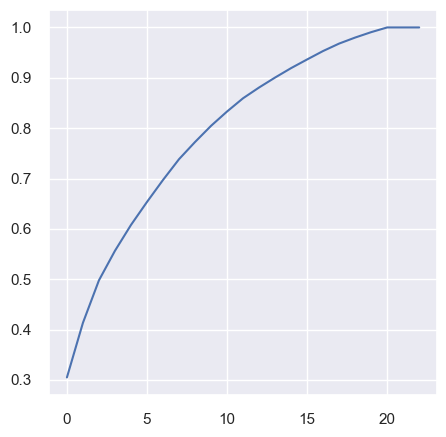

In [85]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

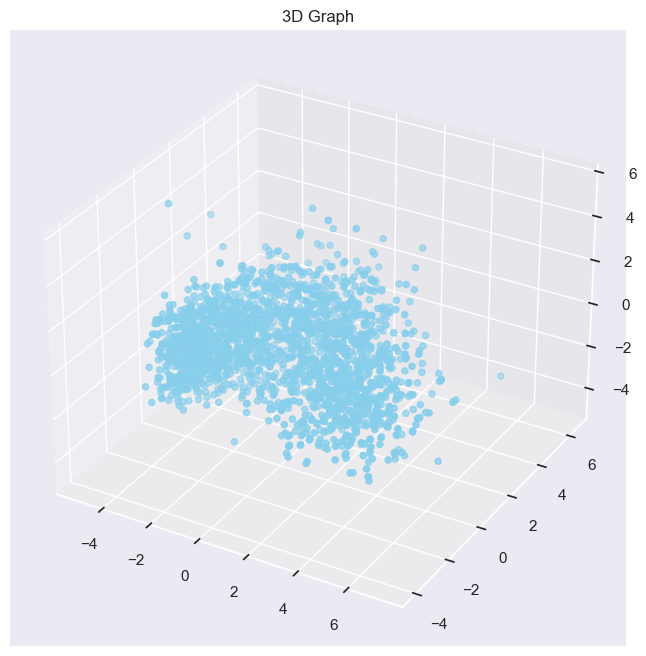

In [86]:
pca = PCA(n_components=3)  # Ensure you extract 3 components
transformed_data = pca.fit_transform(das)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Assuming 'transformed_data' contains all 3 principal components
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c="skyblue", marker="o")
ax.set_title("3D Graph")
plt.show()


**<span style="color:darkbrown">Unsupervised Learning**

**K-Means Clustering**

Elbow graph

In [87]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(das)
    wcss.append(km.inertia_)

In [88]:
wcss

[50968.00000000001,
 38599.15951070748,
 35074.688829978746,
 33170.98597166448,
 32017.724564545875,
 31060.540150796984,
 30249.502431731355,
 29518.097527852664,
 28897.41771588589,
 28352.468709932607]

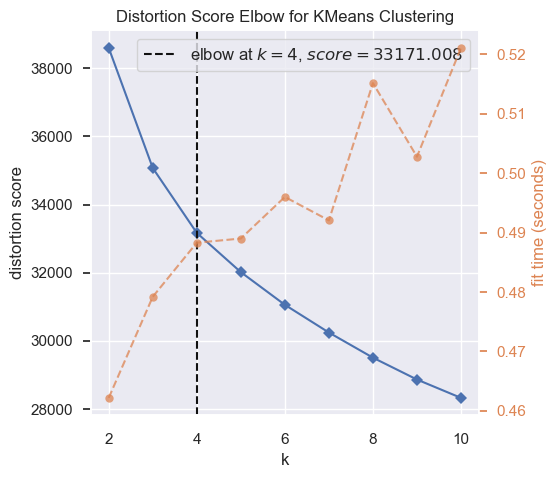

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
em = KElbowVisualizer(KMeans(),k = 10)
em.fit(das)
em.show()

<span style="color:skyblue">We see that the optimum number of cluster that should be used is K = 4 

In [90]:
kmc = KMeans(n_clusters=4)
# fit model and predict cluster

pred = kmc.fit_predict(das)
df1["Cluster"] = pred

In [91]:
df1['Cluster']

0       2
1       0
2       1
3       3
4       3
       ..
2235    1
2236    0
2237    2
2238    1
2239    0
Name: Cluster, Length: 2216, dtype: int32

<span style="color:skyblue">Let us visualize our cluster.

In [92]:
#cluster centre
kmc.cluster_centers_

array([[-0.03057639, -0.57817969,  0.1601658 , -0.04464654, -0.38300956,
         0.37145813,  0.75409387,  0.03641897, -0.69120821, -0.54797486,
        -0.62780493, -0.57366638, -0.54745107, -0.55902104,  0.00610319,
        -0.62930482, -0.66221705, -0.66575501,  0.19268765,  0.57817969,
        -0.79388942,  0.36471953, -0.21764825],
       [-0.03525013, -0.38739436,  0.25891635, -0.02287349,  0.28643861,
        -0.48742938,  0.79418832, -0.04718351,  0.59240279, -0.06688949,
        -0.08975701, -0.11551569, -0.05751198,  0.39391129,  0.70535232,
         0.90331115,  0.22048238,  0.70375584,  0.13527465,  0.38739436,
         0.31309484, -0.30696752,  0.15642874],
       [ 0.02844162,  0.00187435, -0.05822131,  0.06857331,  0.99439506,
        -0.73987068, -0.63029108,  0.02541578,  0.90500259,  1.09071313,
         1.32017911,  1.17611514,  1.08791727,  0.64610148, -0.51455149,
         0.38071387,  1.16637536,  0.78539644, -1.0300244 , -0.00187435,
         1.3059141 ,  0.0080

<span style="color:skyblue">The center cluster (yellow) in the scatter plot likely represents data points that are intermediate or average on both Dimension 0 (horizontal axis) and Dimension 1 (vertical axis) compared to the other data clusters.

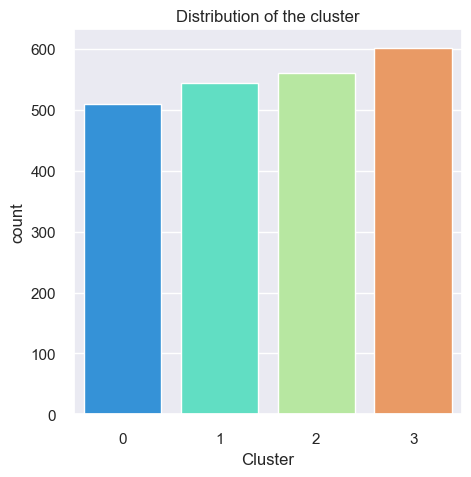

In [93]:
fig = sns.countplot(x = df1['Cluster'], palette='rainbow')
fig.set_title("Distribution of the cluster")
plt.show()

<span style="color:skyblue">The bar chart you sent shows the distribution of a cluster by count. The x-axis shows four clusters (0, 1, 2, and 3), and the y-axis shows the count. It appears that cluster 1 has the highest count, followed by cluster 2 and then cluster 0. Cluster 3 has the fewest data points..

In [94]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,year,month,Cluster
0,5524,1957,1,1,58138.0,0,0,58,635,88,...,3,8,10,4,7,67,1617,2012,9,2
1,2174,1954,1,1,46344.0,1,1,38,11,1,...,2,1,1,2,5,70,27,2014,3,0
2,4141,1965,1,0,71613.0,0,0,26,426,49,...,1,8,2,10,4,59,776,2013,8,1
3,6182,1984,1,0,26646.0,1,0,26,11,4,...,2,2,0,4,6,40,53,2014,2,3
4,5324,1981,3,0,58293.0,1,0,94,173,43,...,5,5,3,6,5,43,422,2014,1,3


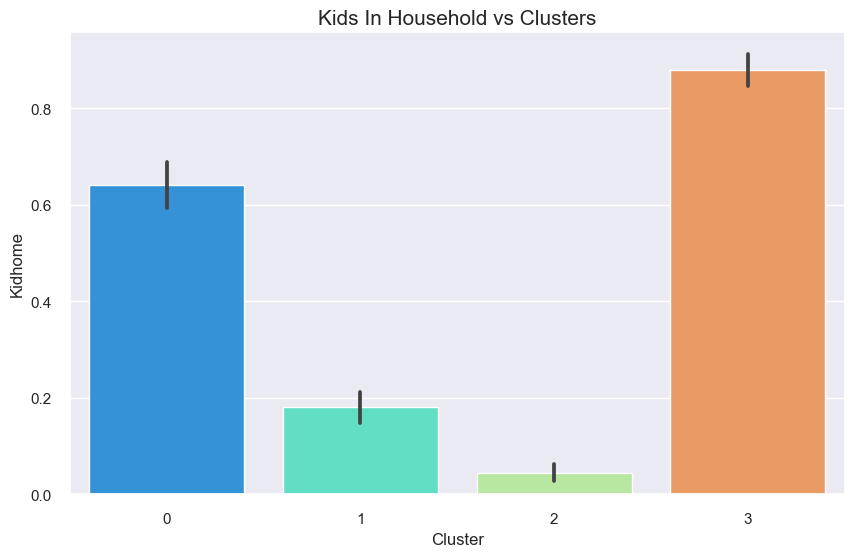

In [95]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=df1["Cluster"], y=df1["Kidhome"],palette='rainbow')
plt.title("Kids In Household vs Clusters", size=15)
plt.show()

<span style="color:skyblue">Cluster 1 and 3 has the maximum number of customers with kids in household.

<span style="color:skyblue">Cluster 0 and 2 has the least number of customers with kids in household

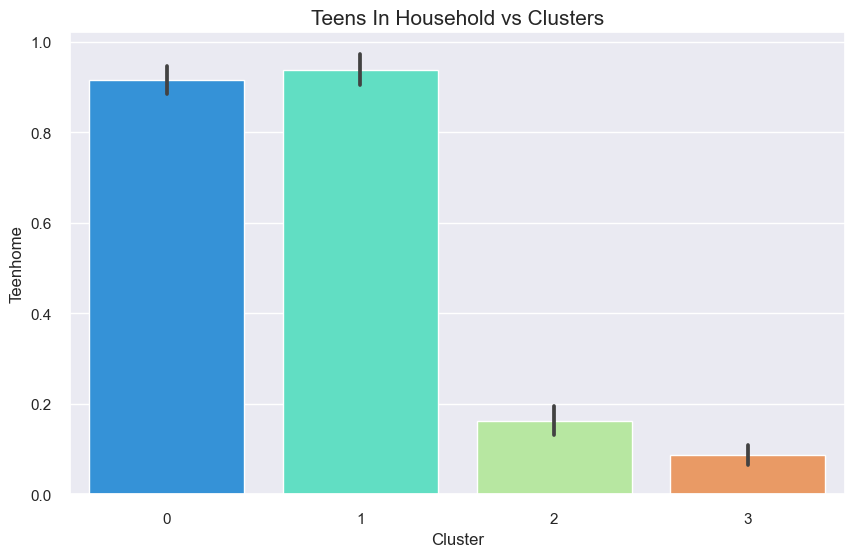

In [96]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=df1["Cluster"], y=df1["Teenhome"],palette='rainbow')
plt.title("Teens In Household vs Clusters", size=15)
plt.show()

<span style="color:skyblue">Cluster 0 and 3 has the maximum number of customers with teens in household.

<span style="color:skyblue">Cluster 1 and 2 has the least number of customers with teens in household

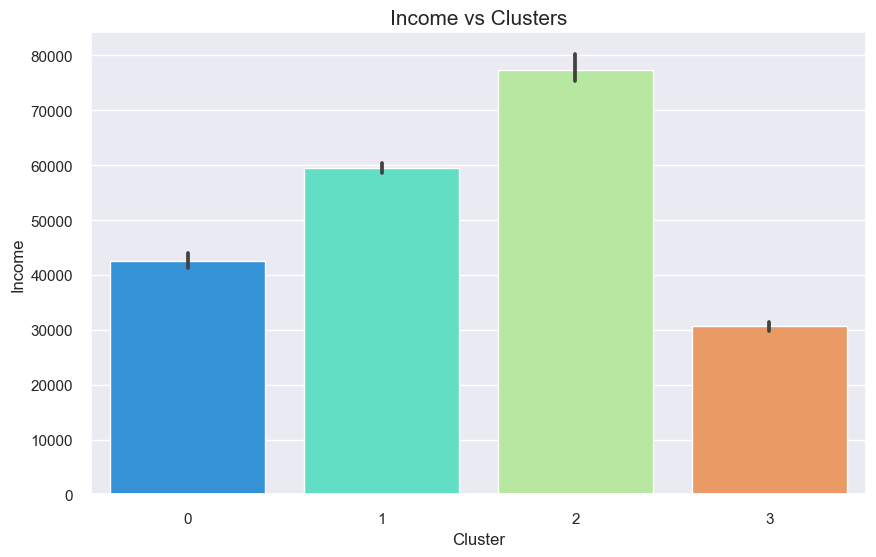

In [97]:
# Lets findout income of customers with in clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=df1["Cluster"], y=df1["Income"],palette='rainbow')
plt.title("Income vs Clusters", size=15)
plt.show()

<span style="color:skyblue">Cluster 2 has the maximum number of customers with high income in household followed by cluster 0.

<span style="color:skyblue">Cluster 1 and 3 has the least number of customers with high income in household

In [98]:
silhouette_score(das,pred)

0.11168166275076988

<span style="color:skyblue">Here we see the silhouette scoree

**Hierarchical Clustering**

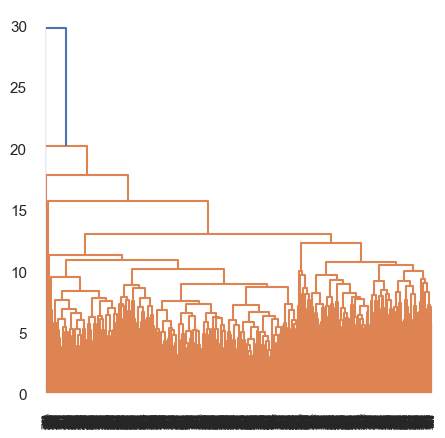

In [99]:
lk = hierarchy.linkage(das, method='complete')
dendrogram = hierarchy.dendrogram(lk)

In [100]:
hc = AgglomerativeClustering(n_clusters=2)

ypred = hc.fit_predict(das)

In [101]:
#Analyzing the clusters
df1.groupby('Cluster').agg('mean')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,year,month
Cluster,,,,,,,,,,,,,,,,,,,,,
0,5489.021569,1961.892157,1.637255,0.333333,42607.898039,0.641176,0.915686,50.066667,71.980392,4.554902,...,15.005882,2.335294,2.360784,0.733333,3.637255,5.786275,62.107843,128.547059,2013.278431,5.705882
1,5473.838235,1964.178309,1.731618,0.343750,59456.165441,0.180147,0.937500,47.647059,504.880515,23.694853,...,64.371324,3.680147,6.560662,3.316176,8.088235,5.647059,59.821691,795.797794,2012.818015,7.011029
2,5680.750000,1968.842857,1.428571,0.387500,77273.585714,0.044643,0.162500,49.748214,610.305357,69.750000,...,77.435714,1.333929,5.128571,6.083929,8.353571,2.821429,55.157143,1394.233929,2013.033929,6.333929
3,5690.036545,1978.863787,1.182724,0.352159,30618.802326,0.878738,0.086379,48.669435,38.117940,6.863787,...,18.923588,2.008306,2.338870,0.554817,3.192691,6.950166,45.136213,109.692691,2013.001661,6.737542


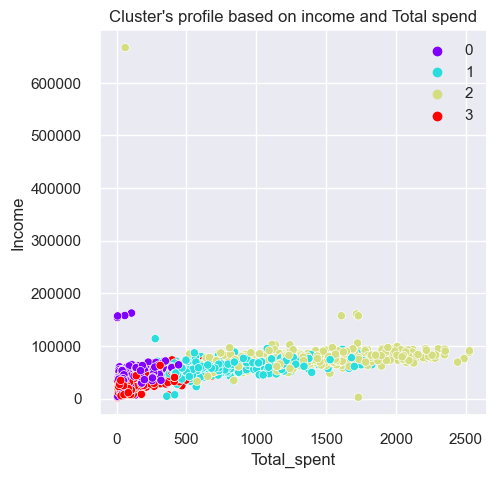

In [102]:
fig = sns.scatterplot(data = df, x = df1["Total_spent"], y = df1['Income'], hue = df1['Cluster'],palette='rainbow')
fig.set_title("Cluster's profile based on income and Total spend")
plt.legend()
plt.show()

<span style="color:skyblue">The following patterns are identified:.
1.<span style="color:skyblue">Group 0: high spending & average income
2.<span style="color:skyblue">Group 1: low spending & low income
3.<span style="color:skyblue">Group 2: high spending & high income
4.<span style="color:skyblue">Group 3: low spending & high income

In [103]:
hc = AgglomerativeClustering(n_clusters=4)
yp = hc.fit_predict(das)
yp

array([2, 3, 2, ..., 2, 2, 3], dtype=int64)

In [104]:
df1[df1['Cluster'] == 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,year,month,Cluster
1,2174,1954,1,1,46344.0,1,1,38,11,1,...,2,1,1,2,5,70,27,2014,3,0
9,5899,1950,3,0,5648.0,1,1,68,28,0,...,1,1,0,0,20,74,49,2014,3,0
13,8180,1952,2,1,59354.0,1,1,53,233,2,...,3,6,1,5,6,72,310,2013,11,0
17,4939,1946,1,0,37760.0,0,0,20,84,5,...,2,4,1,6,7,78,317,2012,8,0
26,2404,1976,1,0,53359.0,1,1,4,173,4,...,4,5,1,4,7,48,257,2013,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,6983,1950,2,1,38054.0,1,1,24,23,2,...,2,2,0,3,7,74,45,2014,5,0
2215,692,1954,1,0,36807.0,1,1,88,4,2,...,1,1,0,2,6,70,16,2012,12,0
2223,1448,1963,2,0,33562.0,1,2,33,21,12,...,3,2,0,4,4,61,51,2014,6,0
2236,4001,1946,3,0,64014.0,2,1,56,406,0,...,7,8,2,5,7,78,444,2014,6,0


In [105]:
df1[df1['Cluster'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,year,month,Cluster
2,4141,1965,1,0,71613.0,0,0,26,426,49,...,1,8,2,10,4,59,776,2013,8,1
5,7446,1967,2,0,62513.0,0,1,16,520,42,...,2,6,4,10,6,57,716,2013,9,1
6,965,1971,1,1,55635.0,0,1,34,235,65,...,4,7,3,7,6,53,590,2012,11,1
18,6565,1949,2,0,76995.0,0,1,91,1012,80,...,2,11,4,9,5,75,1782,2013,3,1
22,1993,1949,3,0,58607.0,0,1,63,867,0,...,3,2,3,9,8,75,972,2012,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,4478,1979,1,0,63777.0,1,1,87,457,5,...,8,11,1,6,8,45,653,2013,3,1
2227,4201,1962,1,1,57967.0,0,1,39,229,7,...,5,4,2,8,5,62,468,2013,3,1
2231,9817,1970,2,1,44802.0,0,0,71,853,10,...,2,9,4,12,8,54,1049,2012,8,1
2235,10870,1967,1,0,61223.0,0,1,46,709,43,...,2,9,3,4,5,57,1341,2013,6,1


In [106]:
df1[df1['Cluster'] == 2]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,year,month,Cluster
0,5524,1957,1,1,58138.0,0,0,58,635,88,...,3,8,10,4,7,67,1617,2012,9,2
12,2125,1959,1,1,63033.0,0,0,82,194,61,...,1,3,4,8,2,65,1102,2013,11,2
15,2114,1946,3,1,82800.0,0,0,23,1006,22,...,1,7,6,12,3,78,1315,2012,11,2
21,5376,1979,1,0,2447.0,1,0,42,1,1,...,15,0,28,0,1,45,1730,2013,1,2
29,1966,1965,3,0,84618.0,0,0,96,684,100,...,1,6,9,10,2,59,1672,2013,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,3661,1995,0,1,80617.0,0,0,42,594,51,...,1,4,6,8,2,29,1435,2012,10,2
2217,9589,1948,3,1,82032.0,0,0,54,332,194,...,0,4,6,7,1,76,1234,2014,4,2
2221,7366,1982,2,1,75777.0,0,0,12,712,26,...,1,3,6,11,1,42,1438,2013,7,2
2233,9432,1977,1,0,666666.0,1,0,23,9,14,...,4,3,1,3,6,47,62,2013,6,2


In [107]:
df1[df1['Cluster'] == 3]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,year,month,Cluster
3,6182,1984,1,0,26646.0,1,0,26,11,4,...,2,2,0,4,6,40,53,2014,2,3
4,5324,1981,3,0,58293.0,1,0,94,173,43,...,5,5,3,6,5,43,422,2014,1,3
7,6177,1985,3,0,33454.0,1,0,32,76,10,...,2,4,0,4,8,39,169,2013,5,3
8,4855,1974,3,0,30351.0,1,0,19,14,0,...,1,3,0,2,9,50,46,2013,6,3
11,387,1976,0,0,7500.0,0,0,59,6,16,...,1,2,0,3,8,48,61,2012,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,10659,1979,0,0,7500.0,1,0,7,2,8,...,4,3,2,2,7,45,53,2013,5,3
2229,10084,1972,1,0,24434.0,2,0,9,3,2,...,2,2,1,2,7,52,50,2014,5,3
2230,7004,1984,1,1,11012.0,1,0,82,24,3,...,3,3,1,2,9,40,84,2013,3,3
2232,8080,1986,1,1,26816.0,0,0,50,5,1,...,1,0,0,3,4,38,22,2012,8,3


In [108]:
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_spent,year,month,Cluster
0,5524,1957,1,1,58138.0,0,0,58,635,88,...,3,8,10,4,7,67,1617,2012,9,2
1,2174,1954,1,1,46344.0,1,1,38,11,1,...,2,1,1,2,5,70,27,2014,3,0
2,4141,1965,1,0,71613.0,0,0,26,426,49,...,1,8,2,10,4,59,776,2013,8,1
3,6182,1984,1,0,26646.0,1,0,26,11,4,...,2,2,0,4,6,40,53,2014,2,3
4,5324,1981,3,0,58293.0,1,0,94,173,43,...,5,5,3,6,5,43,422,2014,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,0,61223.0,0,1,46,709,43,...,2,9,3,4,5,57,1341,2013,6,1
2236,4001,1946,3,0,64014.0,2,1,56,406,0,...,7,8,2,5,7,78,444,2014,6,0
2237,7270,1981,1,1,56981.0,0,0,91,908,48,...,1,2,3,13,6,43,1241,2014,1,2
2238,8235,1956,2,0,69245.0,0,1,8,428,30,...,2,6,5,10,3,68,843,2014,1,1


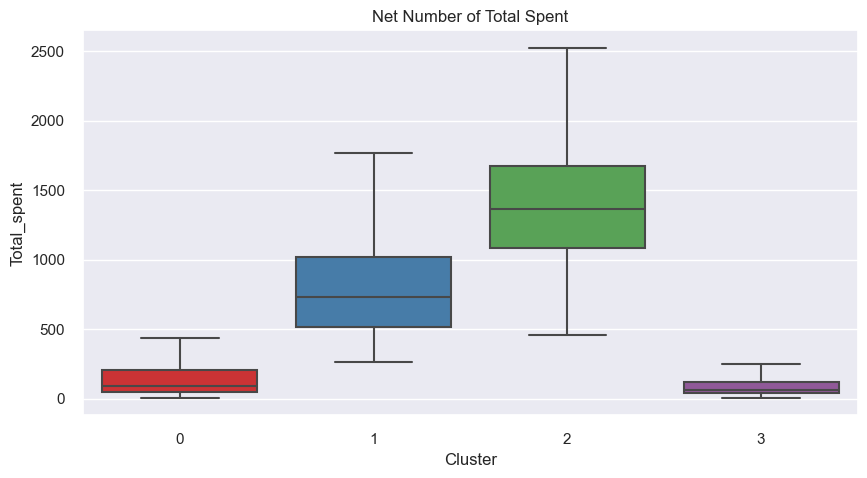

In [109]:

plt.figure(figsize=(10,5))
plt.title(f'Net Number of Total Spent')
ax = sns.boxplot(data=df1, x='Cluster', y='Total_spent', palette=sns.color_palette("Set1"), showfliers=False)
plt.show()

<span style="color:skyblue">From the above box-whisker plots, we make the following inferences:

<span style="color:skyblue">Cluster 0: Low amount of Total spent
<span style="color:skyblue">Cluster 1: Low amount of Total spent
<span style="color:skyblue">Cluster 2: Considerable amount of Total spent
<span style="color:skyblue">Cluster 3: Large amount of Total spent

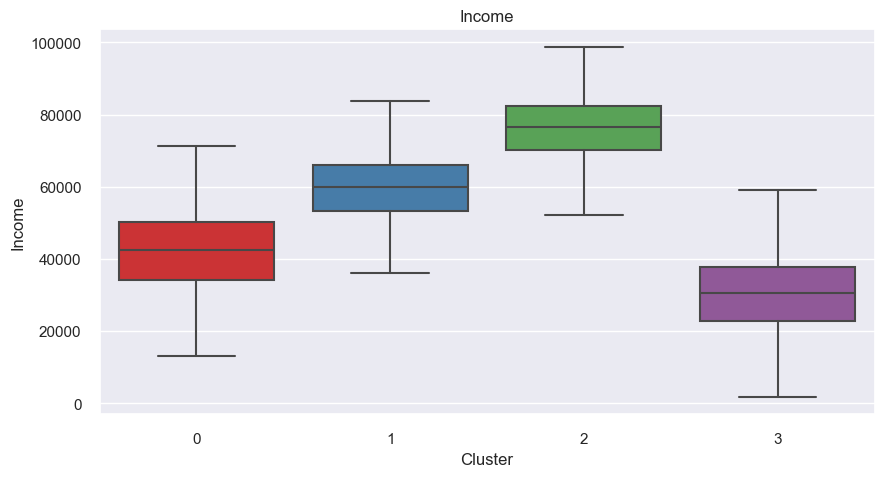

In [110]:

plt.figure(figsize=(10,5))
plt.title(f'Income')
axes = sns.boxplot(data=df1, x='Cluster', y='Income', palette=sns.color_palette("Set1"), showfliers=False)
plt.show()

<span style="color:skyblue">From the above box-whisker plots, we make the following inferences:

<span style="color:skyblue">Cluster 1: Medium income/
<span style="color:skyblue">Cluster 0: Low Income/
<span style="color:skyblue">Cluster 2: High income/
<span style="color:skyblue">Cluster 3: Very high income

In [184]:
df1['Cluster'] = df1['Cluster'].astype('str')
df1['Education'] = df1['Education'].astype('str')

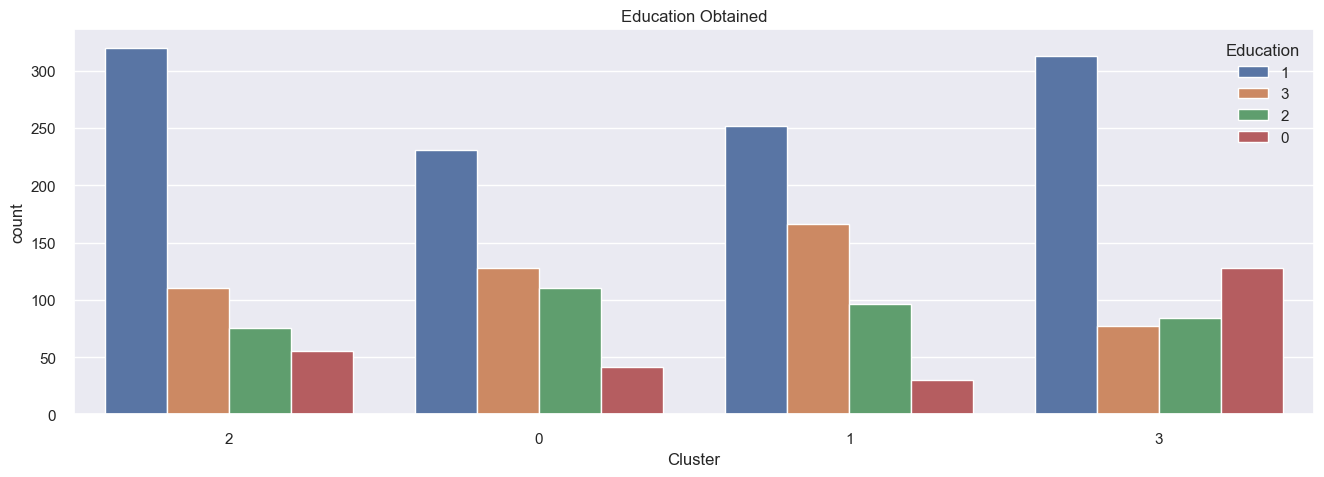

In [185]:
plt.figure(figsize=(16,5))
plt.title(f'Education Obtained')
sns.countplot(data=df1, x='Cluster', hue='Education')
plt.show()

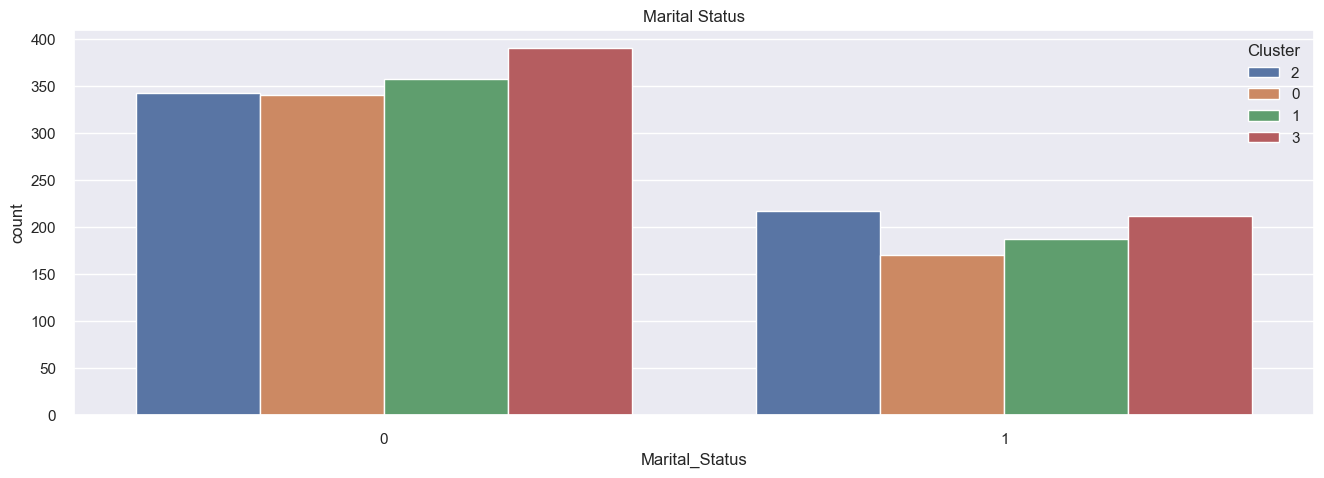

In [113]:
plt.figure(figsize=(16,5))
plt.title(f'Marital Status')
sns.countplot(data=df1, x='Marital_Status', hue='Cluster')
plt.show()

**Profiling**

<Figure size 500x500 with 0 Axes>

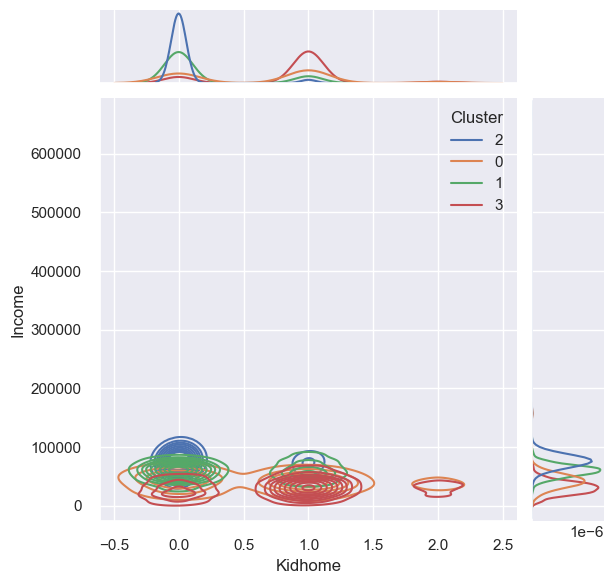

<Figure size 500x500 with 0 Axes>

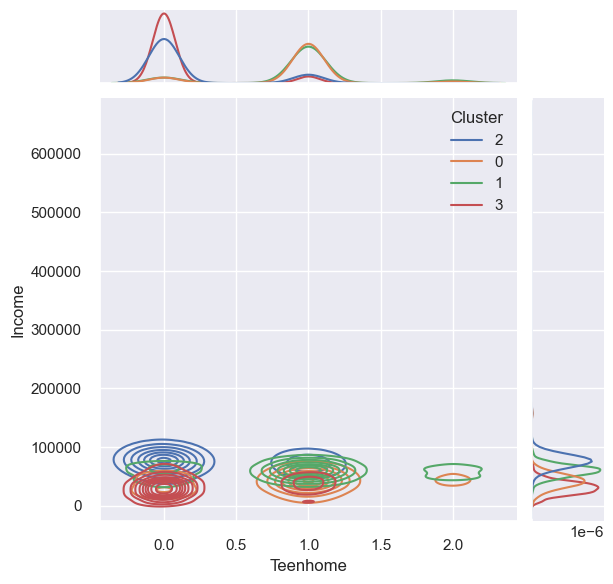

<Figure size 500x500 with 0 Axes>

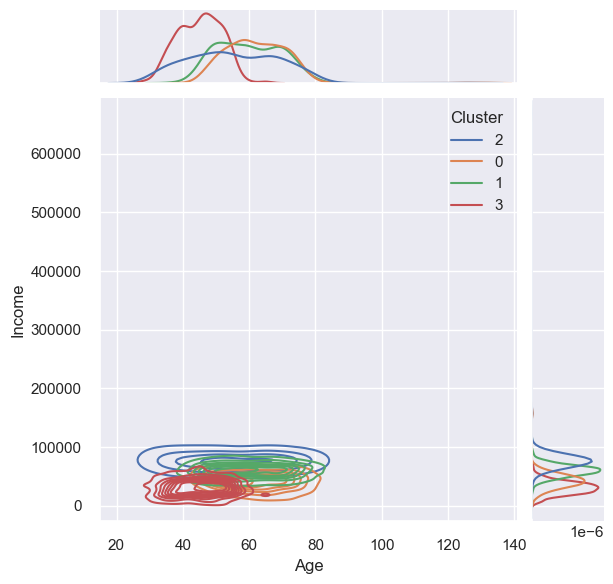

<Figure size 500x500 with 0 Axes>

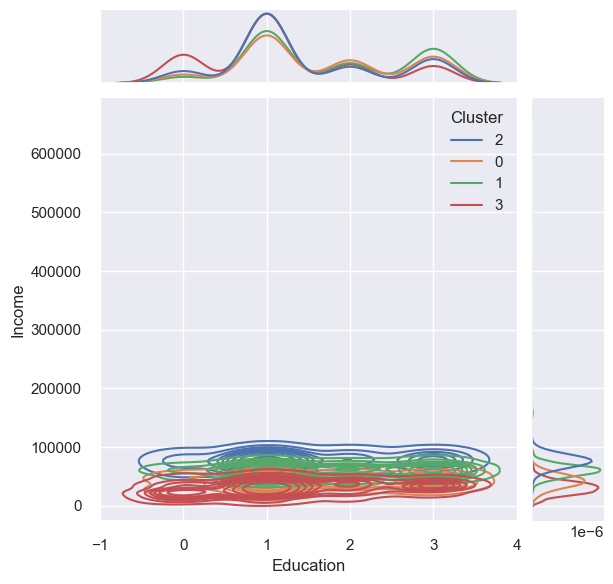

In [114]:


bar_palette = sns.color_palette()  

Personal_Traits = ["Kidhome", "Teenhome", "Age",  "Education"]

for trait in Personal_Traits:
    plt.figure()
    sns.jointplot(x=df1[trait], y=df1["Income"], hue=df1["Cluster"], kind="kde")
    plt.show()

<img src="Picture1.png" alt="Image Alt Text">

**Tranformation**

In [115]:
num_col = ['Income','Age']
numeric_pipeline = make_pipeline(StandardScaler())

In [116]:
ord_col = ['Education']
ordinal_pipeline = make_pipeline(OrdinalEncoder(categories = [['UnderGraduate','Gradute','Postgraudute']]))

In [117]:
nom_col = ['Relationship', 'Single']
nominal_pipeline = make_pipeline(OneHotEncoder())

In [118]:
transformer = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_col),
    ('ordinal', ordinal_pipeline, ord_col),
    ('nominal', nominal_pipeline, nom_col)
])


In [119]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Income', 'Age']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['UnderGraduate',
                                                                              'Gradute',
                                                                              'Postgraudute']]))]),
                                 ['Education']),
                                ('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Relationship', 'Single'])])

In [120]:
#Seprate feature and Target column
x = df1.drop(columns = ['Cluster'])
y = df1['Cluster']

In [121]:
#create train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [122]:
model_pipeline = []

model_pipeline.append(RandomForestClassifier())
model_pipeline.append(LogisticRegression())
model_pipeline.append(GradientBoostingClassifier())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())

In [123]:
selected_model = ['Decision Tree', 'KNN', 'Random Forest', 
                  'Logistic Regression', 'Gradient Boosting']  
accuracies = []  

for model in model_pipeline: 
    model.fit(x_train, y_train) 
    predicted_y = model.predict(x_test)  
    accuracy = accuracy_score(y_test, predicted_y)
    accuracies.append(accuracy)




In [124]:
comparison = pd.DataFrame({'Selected Model' :selected_model, 'Performance Accrucy': accuracies})

In [125]:
comparison

,Selected Model,Performance Accrucy
0,Decision Tree,0.948872
1,KNN,0.750376
2,Random Forest,0.942857
3,Logistic Regression,0.646617
4,Gradient Boosting,0.906767


# <span style="color:darkred">MODEL BUILDING

**LOGISTIC REGRESSION**

In [126]:
#Logistic Regression using KFold validation technique 
kfold = KFold(n_splits=3)
logisticReg = LogisticRegression()
cross_val_lr = cross_val_score(logisticReg,x_train,y_train,cv=kfold)

In [127]:
#cross validation scores and their mean
print(cross_val_lr)
print('mean:',cross_val_lr.mean()*100)

[0.7582205  0.76208897 0.76208897]
mean: 76.07994842037394


In [128]:
#Y_pred or Ŷ values
Y_pred = logisticReg.fit(x_train,y_train).predict(x_test)

In [129]:
#Accuracy score
acc = accuracy_score(y_test,Y_pred)*100
print("Accuracy =", acc)

Accuracy = 75.0375939849624


In [130]:
print(confusion_matrix(y_test,Y_pred))

[[ 94   5   1  56]
 [  5 145  10   3]
 [  1  25 141   0]
 [ 53   7   0 119]]


In [131]:
#display classification report 
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.61      0.60      0.61       156
           1       0.80      0.89      0.84       163
           2       0.93      0.84      0.88       167
           3       0.67      0.66      0.67       179

    accuracy                           0.75       665
   macro avg       0.75      0.75      0.75       665
weighted avg       0.75      0.75      0.75       665



**RANDOM FOREST**

In [132]:
#Random Forest using KFold validation technique
rf = RandomForestClassifier(bootstrap=False, max_depth=100, max_features='auto',
                            min_samples_leaf=2, n_estimators=500)
cross_val_rf = cross_val_score(rf,x_train,y_train,cv=kfold)

In [133]:
#cross validation scores and their mean
print(cross_val_rf)
print('mean:',cross_val_rf.mean()*100)

[0.94003868 0.93423598 0.94390716]
mean: 93.93939393939394


In [134]:
#Y_pred or Ŷ values
Y_pred4 = rf.fit(x_train,y_train).predict(x_test)

In [135]:
#Accuracy score
acc = accuracy_score(y_test,Y_pred4)*100
print("Accuracy =", acc)

Accuracy = 95.18796992481204


In [136]:
#display confusion matrix
print(confusion_matrix(y_test,Y_pred4))

[[149   3   0   4]
 [  4 153   6   0]
 [  0   6 161   0]
 [  7   1   1 170]]


In [137]:
#display classification report 
print(classification_report(y_test,Y_pred4))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       156
           1       0.94      0.94      0.94       163
           2       0.96      0.96      0.96       167
           3       0.98      0.95      0.96       179

    accuracy                           0.95       665
   macro avg       0.95      0.95      0.95       665
weighted avg       0.95      0.95      0.95       665



In [138]:
#hyper-parameter tuning for Random Forest 
estimator_rf = RandomForestClassifier()
param_rf = [{'max_depth': [2,3,5,None],'min_samples_leaf': [2,4,5],
             'n_estimators': [100,300,500],'max_features':['auto','sqrt'],
             'max_depth':[10,50,100],'min_samples_split':[2,5,10],
             'bootstrap':[True, False]}]
rf_random = RandomizedSearchCV(estimator = estimator_rf, param_distributions = param_rf, 
                               n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 50, 100],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [2, 4, 5],
                                         'min_samples_split': [2, 5, 10],
                                         'n_estimators': [100, 300, 500]}],
                   random_state=42, verbose=2)

**K-NEAREST NEIGHBOR**

In [139]:
#KNN using KFold validation technique 
knn = KNeighborsClassifier(n_neighbors=2)
cross_val_knn = cross_val_score(knn,x_train,y_train,cv=kfold)

In [140]:
#cross validation scores and their mean
print(cross_val_knn)
print('mean:',cross_val_knn.mean()*100)

[0.59961315 0.5589942  0.61121857]
mean: 58.994197292069636


In [141]:
#Y_pred or Ŷ values
Y_pred1 = knn.fit(x_train,y_train).predict(x_test)

In [142]:
#Accuracy score
acc = accuracy_score(y_test,Y_pred1)*100
print("Accuracy =", acc)

Accuracy = 56.090225563909776


In [143]:
#display classification report 
print(classification_report(y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.41      0.62      0.49       156
           1       0.53      0.58      0.55       163
           2       0.81      0.61      0.70       167
           3       0.65      0.45      0.53       179

    accuracy                           0.56       665
   macro avg       0.60      0.56      0.57       665
weighted avg       0.60      0.56      0.57       665



In [144]:
#GridSeachCV for n_neighbors
estimator = KNeighborsClassifier()
param_grid = dict(n_neighbors = np.arange(2,42))
gridSearch = GridSearchCV(estimator,param_grid,)
gridSearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41])})

In [145]:
#printing the best parameters, best score of GridSearchCV
print(gridSearch.best_params_)
print(gridSearch.best_score_)

{'n_neighbors': 11}
0.6492376309511461


**Decision Tree**

In [146]:
# Initialize Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()

# Define K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_dt = cross_val_score(decision_tree_classifier, x_train, y_train, cv=kfold)

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [148]:
decision_tree = DecisionTreeClassifier(max_depth=5)  # Adjust max_depth as needed

In [149]:
# Train the model on the training data
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [150]:
# Make predictions on the testing data
y_pred = decision_tree.predict(x_test)

In [151]:
y_pred

array(['1', '3', '0', '2', '3', '2', '2', '1', '0', '2', '0', '3', '0',
       '1', '0', '2', '3', '2', '0', '2', '1', '1', '0', '3', '1', '1',
       '1', '3', '2', '2', '3', '2', '3', '3', '3', '0', '2', '0', '2',
       '2', '2', '0', '2', '1', '1', '0', '1', '3', '3', '3', '1', '3',
       '3', '1', '1', '2', '2', '1', '0', '3', '2', '3', '3', '3', '2',
       '1', '3', '2', '2', '1', '2', '1', '0', '0', '0', '0', '1', '2',
       '3', '1', '2', '2', '2', '2', '0', '3', '1', '3', '1', '0', '1',
       '3', '2', '3', '2', '1', '2', '2', '0', '3', '1', '0', '3', '1',
       '2', '3', '1', '3', '2', '3', '0', '1', '2', '2', '1', '3', '3',
       '0', '2', '2', '1', '1', '1', '1', '1', '3', '0', '2', '0', '3',
       '0', '0', '2', '0', '0', '1', '0', '3', '2', '2', '3', '3', '3',
       '3', '2', '1', '1', '2', '0', '1', '3', '3', '3', '1', '2', '0',
       '0', '3', '3', '3', '0', '3', '3', '1', '1', '2', '0', '2', '2',
       '1', '1', '2', '0', '3', '1', '2', '3', '1', '0', '2', '3

In [152]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8964


In [153]:
#display classification report 
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.88      0.92       100
           1       0.77      0.93      0.84        96
           2       0.92      0.84      0.88       124
           3       0.94      0.94      0.94       124

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90       444
weighted avg       0.90      0.90      0.90       444



**Gradient Boosting**

In [154]:
gb_classifier = GradientBoostingClassifier()

# Define K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_gb = cross_val_score(gb_classifier, x_train, y_train, cv=kfold)

In [155]:
cross_val_gb.mean()*100

94.75244688469802

In [156]:
# Define features and target variable
features = ['Income','Kidhome','Teenhome','Age','Marital_Status','Education'] #['Age', 'Education', 'Income', 'Total_spent']  
target = ['Cluster']

In [157]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df1[features], df1[target], test_size=0.2, random_state=42)

In [158]:
# Create the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)


In [159]:
# Train the model
model.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5)

In [160]:
# Make predictions on the test set
y_pred = model.predict(x_test)

In [161]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8153153153153153


In [162]:
# (Optional) Feature importances
# You can use the feature_importances_ attribute to see which features were most important for the model
print("Feature importances:", model.feature_importances_)

Feature importances: [0.58934581 0.04382255 0.19204282 0.1468725  0.00645086 0.02146547]


**<span style="color:blue">CHOOSING THE FINAL MODEL**

In [163]:

# Assuming you have already calculated cross-validation scores for different models
# cross_val_lr, cross_val_rf, cross_val_knn, cross_val_dt, cross_val_gb

# Calculate mean accuracy for Decision Tree and Gradient Boosting
mean_accuracy_dt = cross_val_dt.mean()
mean_accuracy_gb = cross_val_gb.mean()

# Create a DataFrame with model names and accuracy scores
acc = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree', 'Gradient Boosting'],
    'Accuracy': [cross_val_lr.mean() * 100, cross_val_rf.mean() * 100, cross_val_knn.mean() * 100, mean_accuracy_dt * 100, mean_accuracy_gb * 100]
})

# Sort the DataFrame by accuracy in descending order
acc = acc.sort_values(by='Accuracy', ascending=False)

# Print the DataFrame
print(acc)


                 Model   Accuracy
4    Gradient Boosting  94.752447
1        Random Forest  93.939394
3        Decision Tree  90.264080
0  Logistic Regression  76.079948
2                  KNN  58.994197


## Gradient Boosting for deployment

In [164]:
# Define features and target variable
features = ['Income','Kidhome','Teenhome','Age','Marital_Status','Education'] 
target = 'Cluster'  

In [165]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df1[features], df1[target], test_size=0.2, random_state=42)

In [166]:
# Create the Gradient Boosting model
gradient_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)


In [167]:
# Train the model
gradient_model.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5)

In [168]:
# Make predictions on the test set
y_pred1 = gradient_model.predict(x_test)

In [169]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8153153153153153


In [170]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       100
           1       0.64      0.70      0.67        96
           2       0.88      0.82      0.85       124
           3       0.91      0.94      0.93       124

    accuracy                           0.82       444
   macro avg       0.81      0.81      0.81       444
weighted avg       0.82      0.82      0.82       444



In [171]:
import pickle
pickle.dump(gradient_model , open('gradient_boosting_1.pkl' , 'wb'))

# <span style="color:darkred">  DEPLOYMENT

In [190]:
import streamlit as st
import pickle
import pandas as pd

with open('gradient_boosting_1.pkl', 'wb') as f:
    pickle.dump(gradient_model , open('gradient_boosting_1.pkl' , 'wb'))

filename = 'gradient_boosting_1.pkl'
pickle.dump(gradient_model, open(filename, 'wb'))


In [191]:
!streamlit run customer_segmentation_app.py & npx localtunnel --port 8501 

^C
